# Rainfall Weather Forecasting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"C:\Users\mahes\Downloads\weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
print("Dataset have \nRows-",df.shape[0],'\nColumns -',df.shape[1])

Dataset have 
Rows- 8425 
Columns - 23


We have 8425 Rows and 23 Columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

We have 7 object features,  16 float64 features

and many features have missing values

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


## Missing Values

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

<AxesSubplot:>

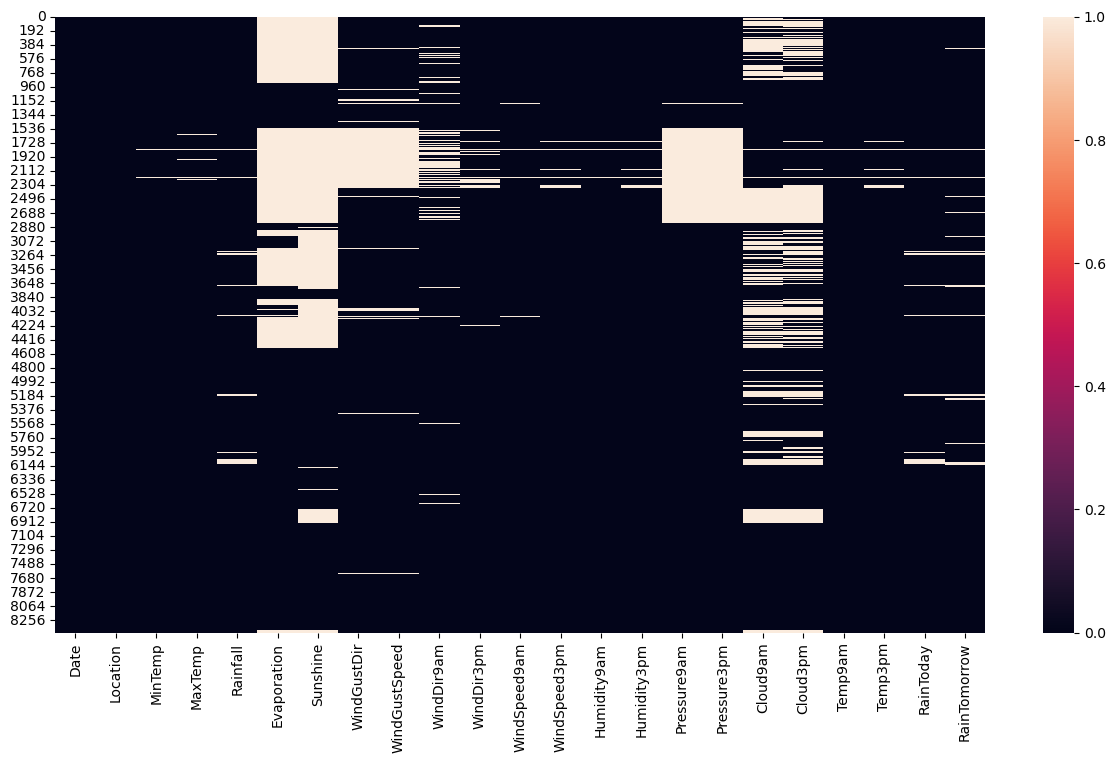

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

Alot of missing values are present in the dataset

In [11]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']

In [13]:
catg_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [14]:
cont_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

([<matplotlib.patches.Wedge at 0x196800b9d90>,
 [Text(0.6343483909086429, 0.8986668564888858, 'Categorical'),
  Text(-0.6343483909086428, -0.8986668564888859, 'Continuous')],
 [Text(0.3460082132228961, 0.4901819217212104, '30.4%'),
  Text(-0.34600821322289604, -0.49018192172121045, '69.6%')])

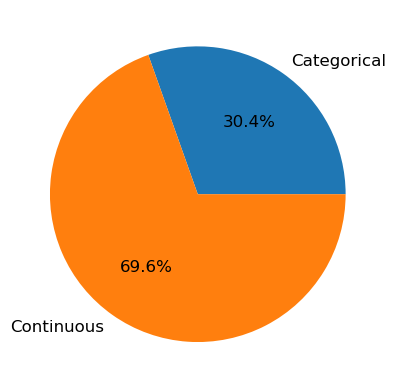

In [15]:
data = pd.DataFrame({'Type': ['Categorical', 'Continuous'], 'Count': [len(catg_features), len(cont_features)]})
sns.barplot(x='Type', y='Count', data=data)
plt.show()

30.4% features are Categorical while 69.6% features are continuous

## Target Feature

In [16]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100

No     73.531157
Yes    23.632047
NaN     2.836795
Name: RainTomorrow, dtype: float64

In [18]:
target_df=df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100

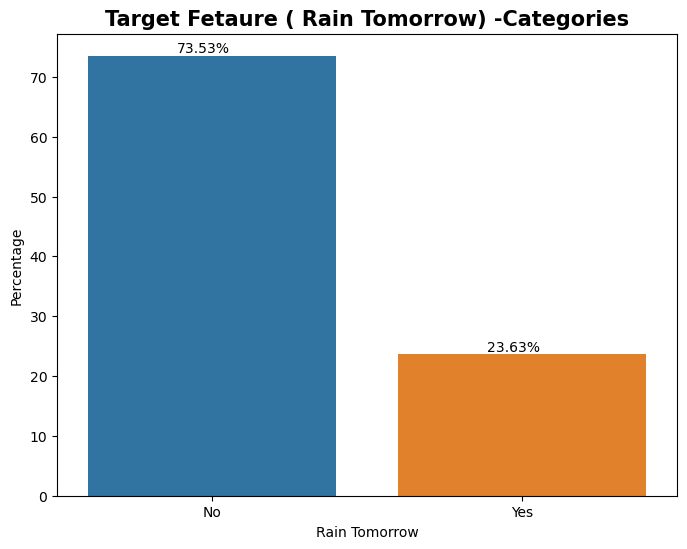

In [19]:
plt.figure(figsize=(8,6))
plt.title("Target Fetaure ( Rain Tomorrow) -Categories",fontweight='bold',fontsize=15)
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Rain Tomorrow')
plt.ylabel('Percentage')



for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x +width/2.8,height+.5,f'{height:.2f}%')


## Date

In [20]:
df['Date'].nunique()

3004

## Location

In [21]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [22]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Melbourne'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'PerthAirport'),
  Text(3, 0, 'Albury'),
  Text(4, 0, 'Newcastle'),
  Text(5, 0, 'CoffsHarbour'),
  Text(6, 0, 'Brisbane'),
  Text(7, 0, 'Penrith'),
  Text(8, 0, 'Wollongong'),
  Text(9, 0, 'Darwin'),
  Text(10, 0, 'Adelaide'),
  Text(11, 0, 'Uluru')])

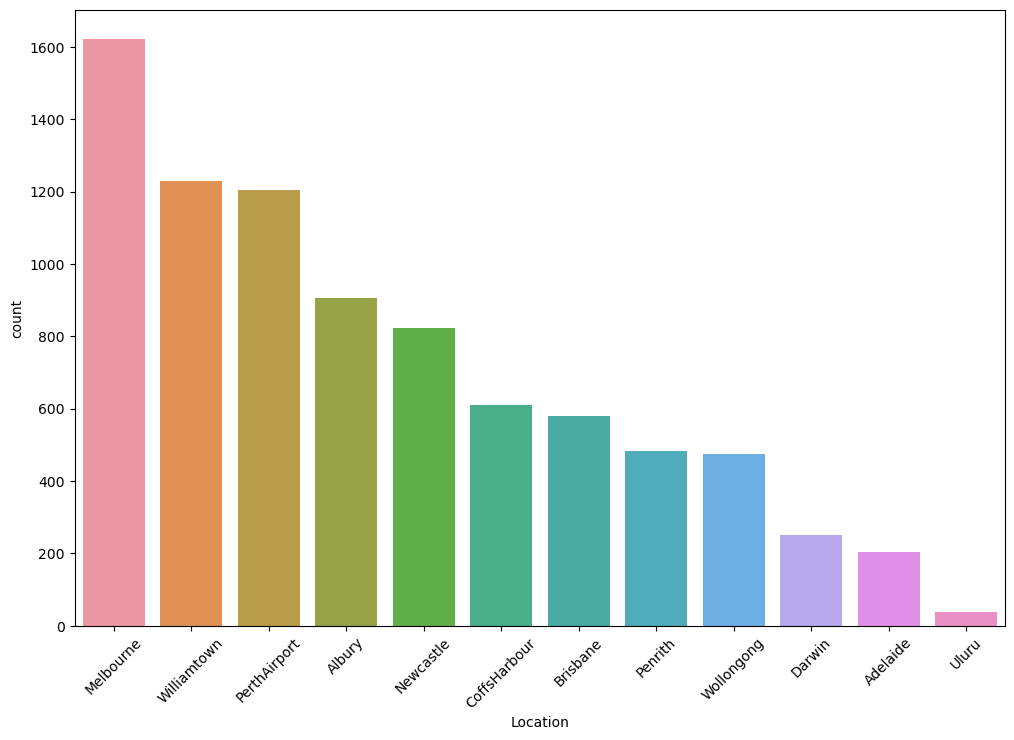

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(df['Location'],order=df['Location'].value_counts().index)
plt.xticks(rotation=45)

### Weather station location numbers:

Melbourne       1622

Williamtown     1230

PerthAirport    1204

Albury           907

Newcastle        822

CoffsHarbour     611

Brisbane         579

Penrith          482

Wollongong       474

Darwin           250

Adelaide         205

Uluru             39

## MinTemp

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

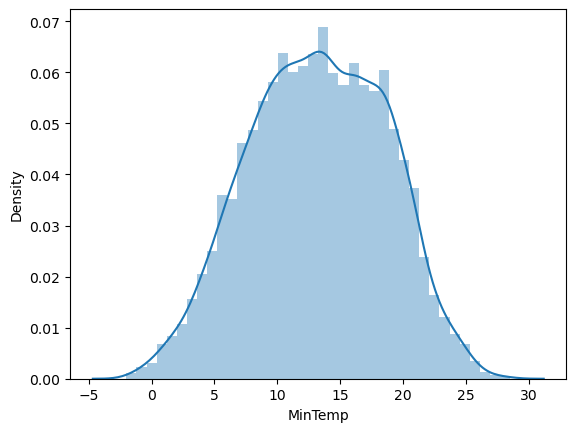

In [24]:
sns.distplot(df['MinTemp'])

Data distribution looke like normally distributed

## MaxTemp

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

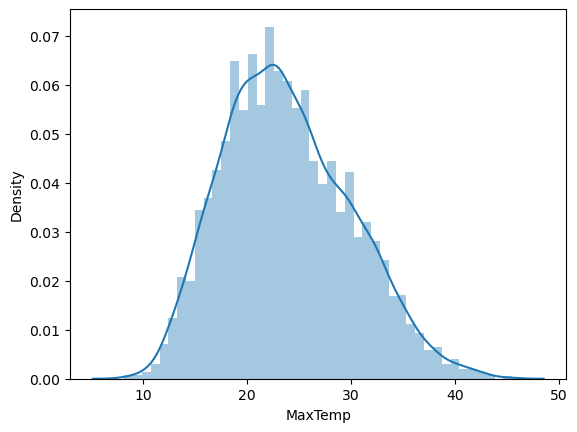

In [25]:
sns.distplot(df['MaxTemp'])

## Distribution of Continuous features

In [26]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

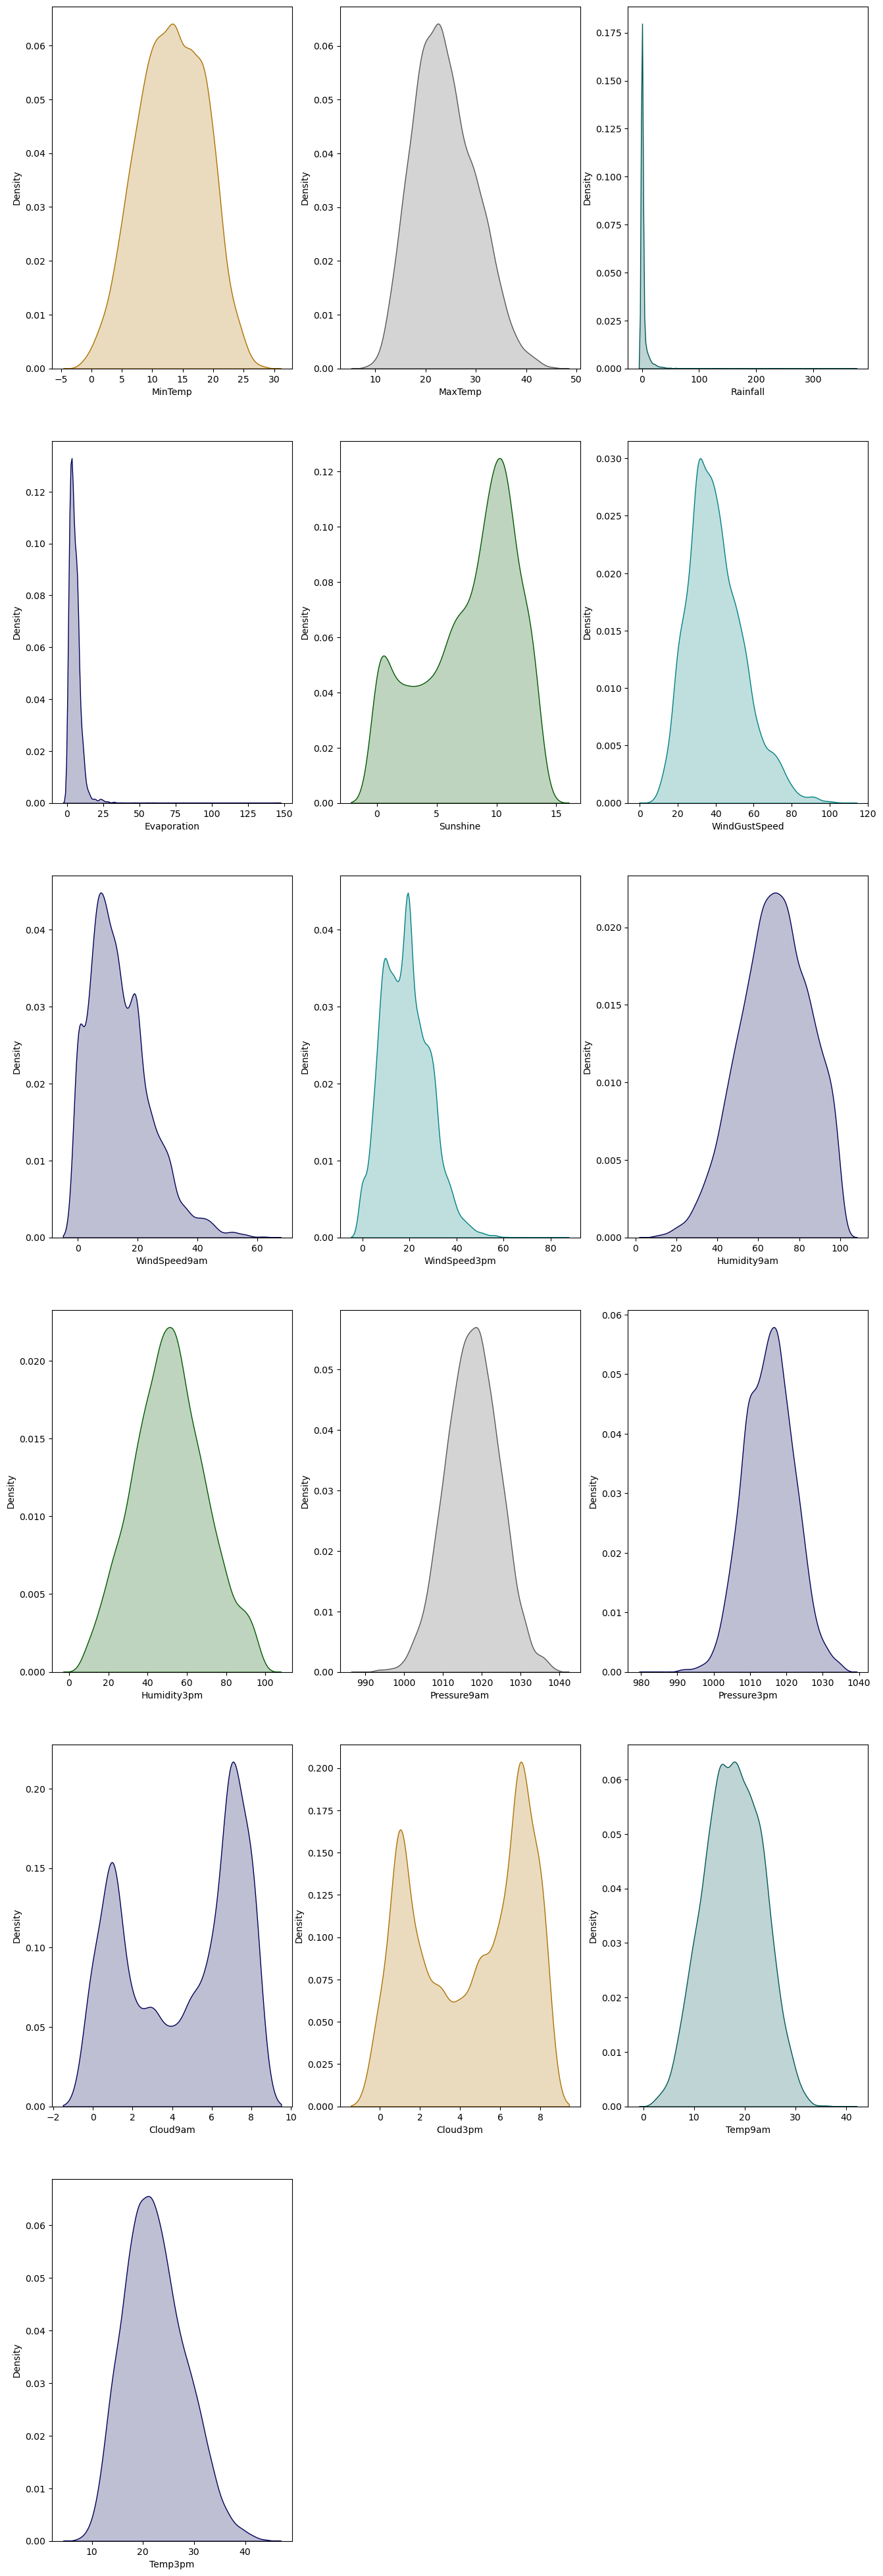

In [27]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[cont_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)
    
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

Most of the data distribution is not normally distributed

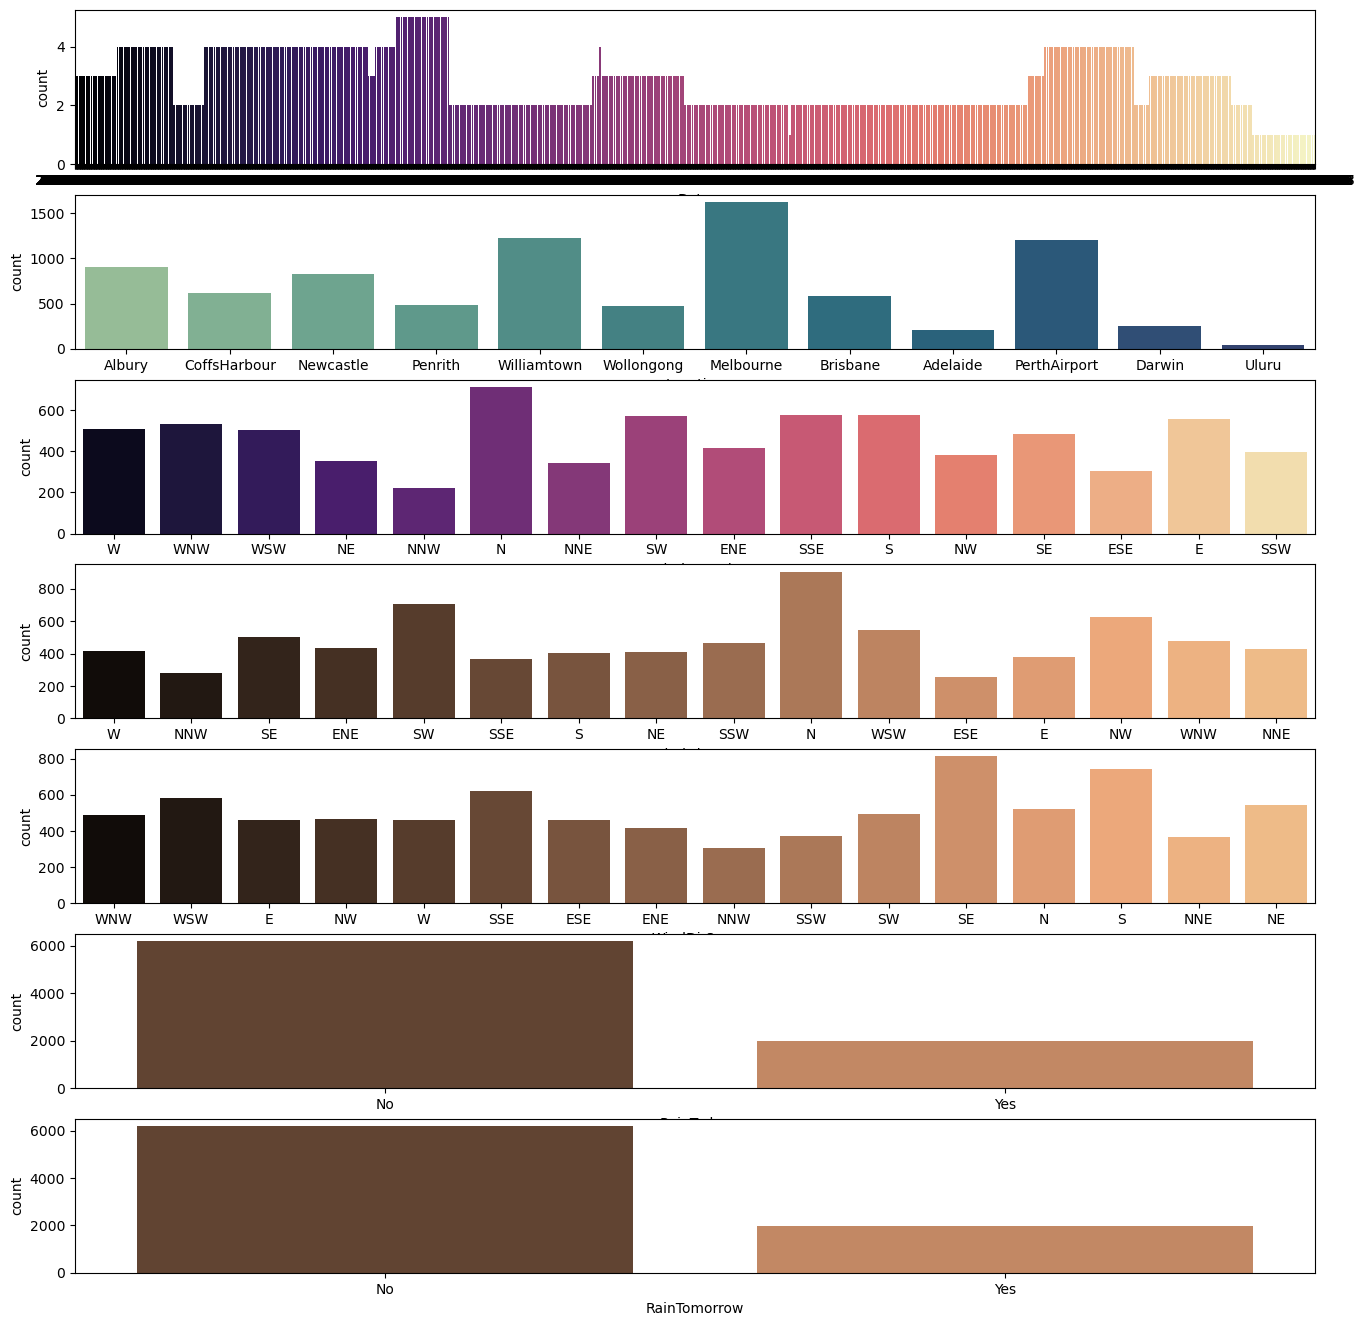

In [28]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[catg_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(21,1,i+1)
    
    sns.countplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

# Bivarient EDA

In [29]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [30]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Melbourne'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'PerthAirport'),
  Text(3, 0, 'Albury'),
  Text(4, 0, 'Newcastle'),
  Text(5, 0, 'CoffsHarbour'),
  Text(6, 0, 'Brisbane'),
  Text(7, 0, 'Penrith'),
  Text(8, 0, 'Wollongong'),
  Text(9, 0, 'Darwin'),
  Text(10, 0, 'Adelaide'),
  Text(11, 0, 'Uluru')])

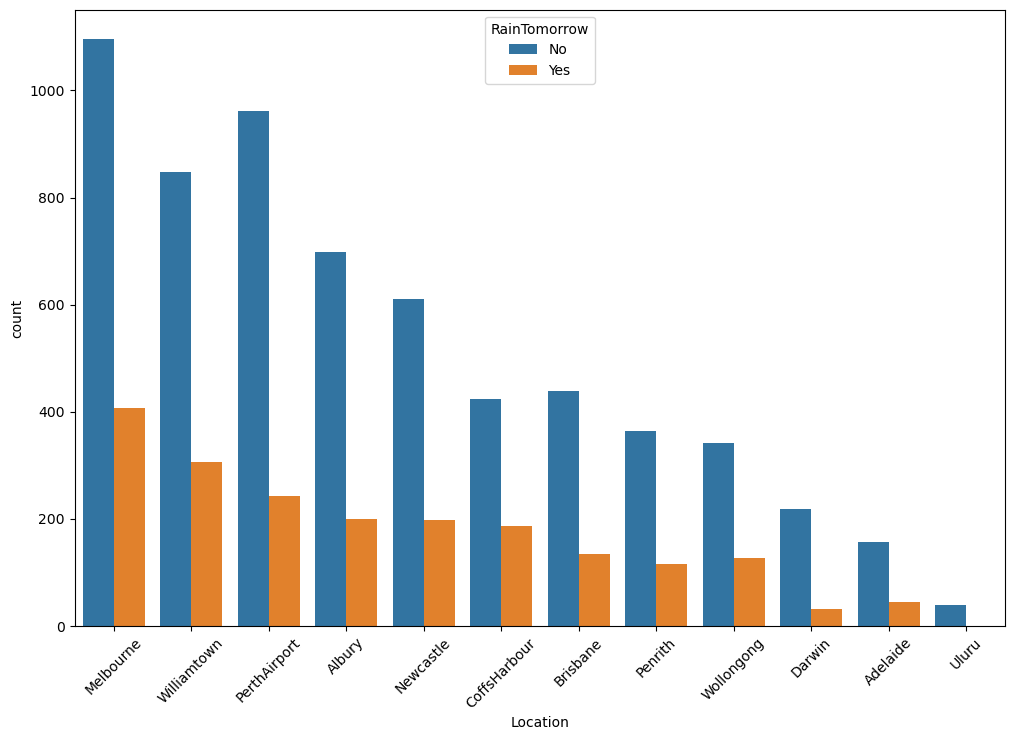

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(df['Location'],order=df['Location'].value_counts().index,hue=df['RainTomorrow'])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Location'>

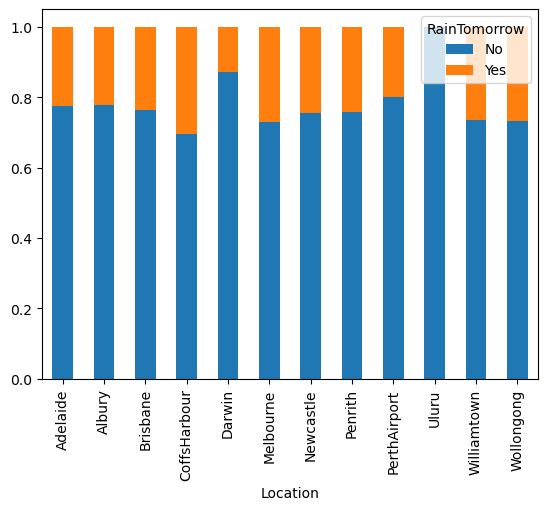

In [32]:
table = pd.crosstab(df['Location'], df['RainTomorrow'])
normalized_table = table.div(table.sum(axis=1), axis=0)
melted_table = normalized_table.reset_index().melt(id_vars='Location')
sns.barplot(x='Location', y='value', hue='RainTomorrow', data=melted_table)
plt.show()


# MinTemp', 'MaxTemp

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

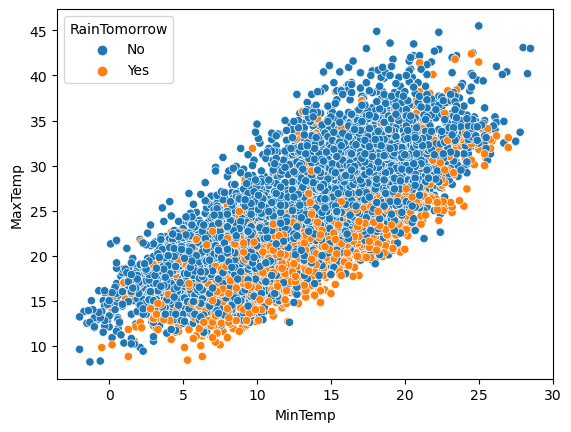

In [33]:
sns.scatterplot(df['MinTemp'],df['MaxTemp'],hue='RainTomorrow',data=df)

# 'Evaporation',
       'Sunshine'

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

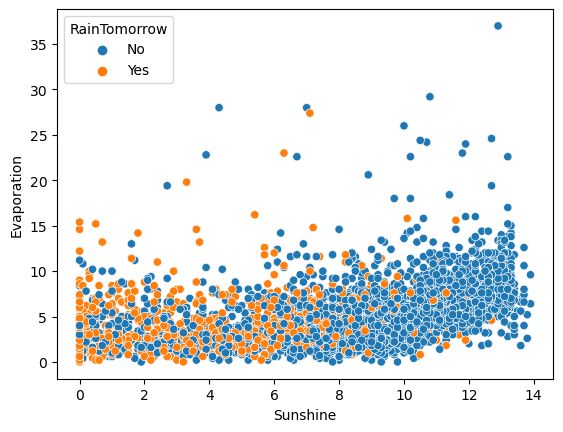

In [34]:
sns.scatterplot(df['Sunshine'],df['Evaporation'],hue='RainTomorrow',data=df)

# WindGustDir', 'WindGustSpeed

<AxesSubplot:xlabel='WindGustSpeed', ylabel='WindGustDir'>

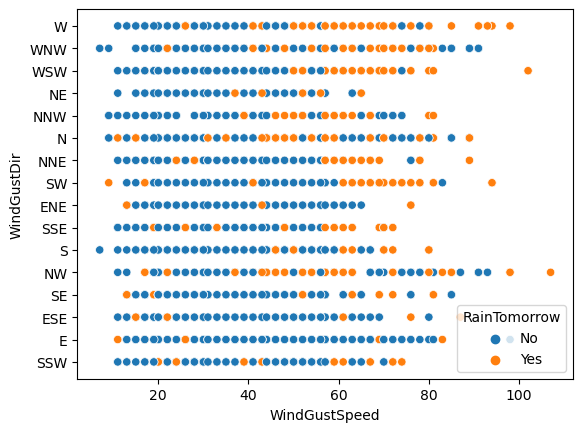

In [35]:
sns.scatterplot(df['WindGustSpeed'],df['WindGustDir'],hue='RainTomorrow',data=df)

# WindDir9am  WindSpeed9am

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindDir9am'>

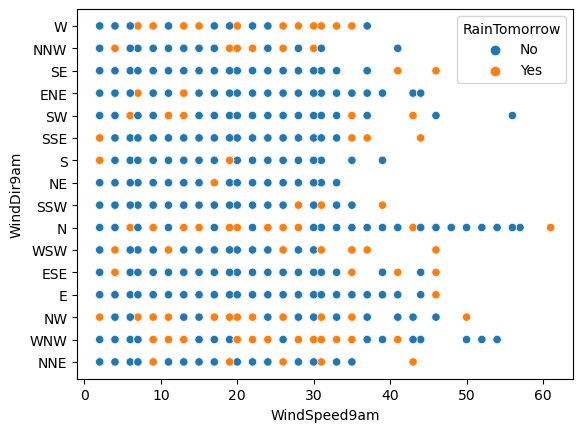

In [36]:
sns.scatterplot(df['WindSpeed9am'],df['WindDir9am'],hue='RainTomorrow',data=df)

# WindDir3pm WindSpeed3pm

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='WindDir3pm'>

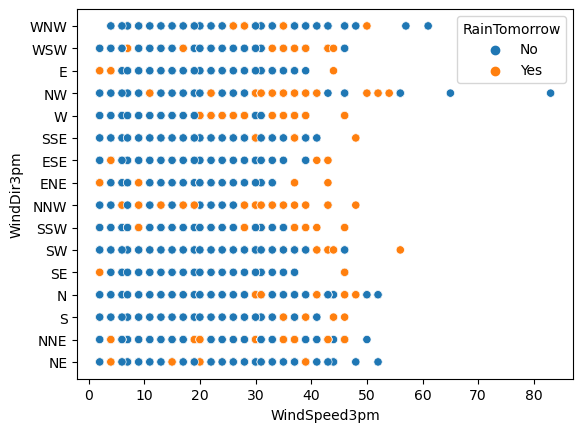

In [37]:
sns.scatterplot(df['WindSpeed3pm'],df['WindDir3pm'],hue='RainTomorrow',data=df)

In [38]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# 'Humidity9am', 'Humidity3pm'

<AxesSubplot:xlabel='Humidity3pm', ylabel='Humidity9am'>

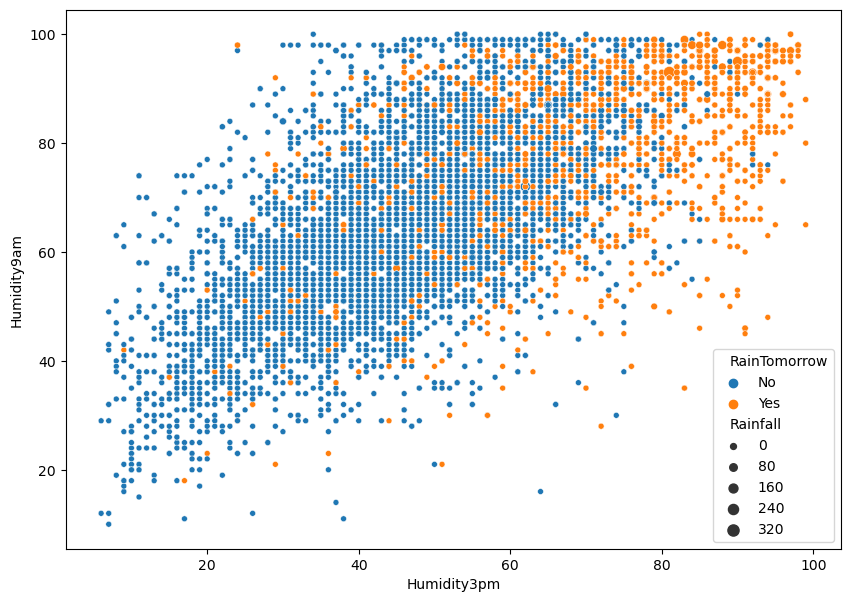

In [39]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['Humidity3pm'],df['Humidity9am'],hue='RainTomorrow',size='Rainfall',data=df)

# Pressure9am', 'Pressure3pm

<AxesSubplot:xlabel='Pressure3pm', ylabel='Pressure9am'>

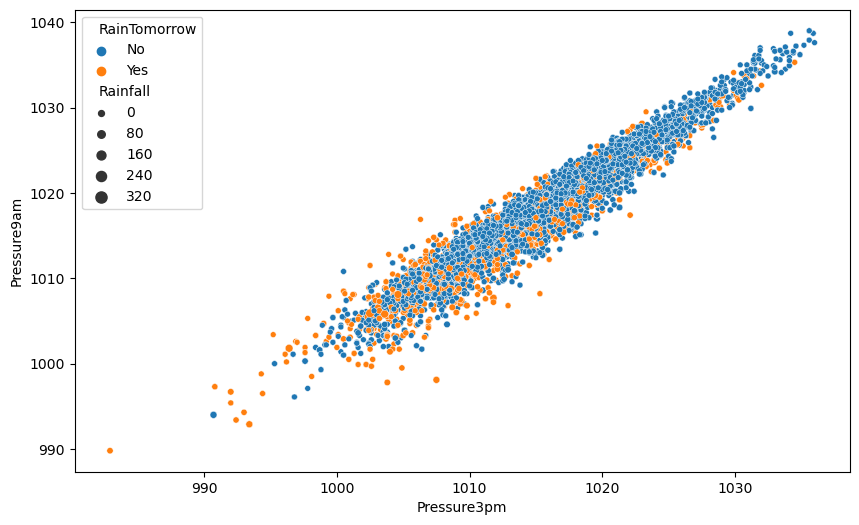

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Pressure3pm'],df['Pressure9am'],hue='RainTomorrow',size='Rainfall',data=df)

# 'Cloud9am', 'Cloud3pm'

<AxesSubplot:xlabel='Cloud3pm', ylabel='Cloud9am'>

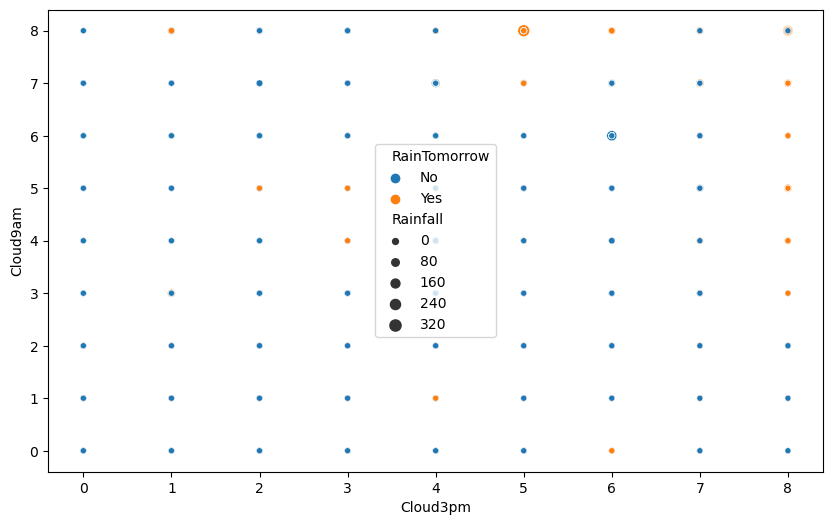

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Cloud3pm'],df['Cloud9am'],hue='RainTomorrow',size='Rainfall',data=df)


# Temp9am','Temp3pm

<AxesSubplot:xlabel='Temp3pm', ylabel='Temp9am'>

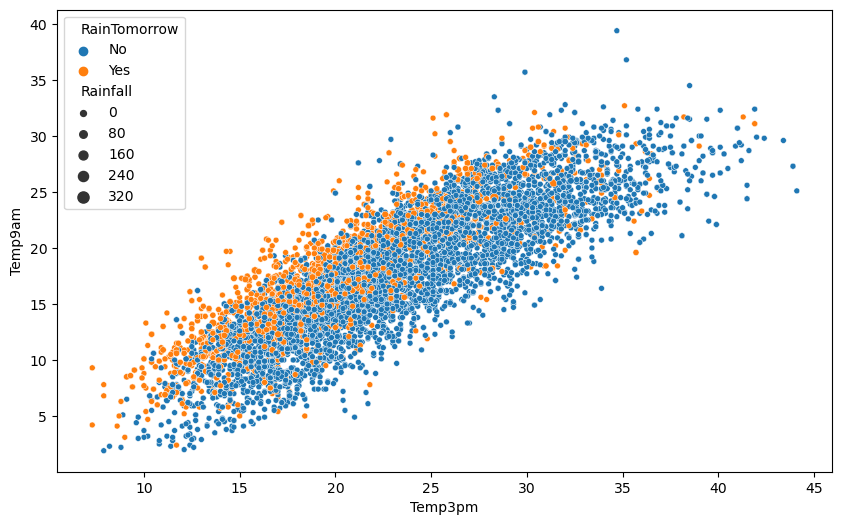

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Temp3pm'],df['Temp9am'],hue='RainTomorrow',size='Rainfall',data=df)


# RainToday', 'RainTomorrow'

In [43]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [44]:
df.groupby('RainToday')['RainTomorrow'].value_counts()

RainToday  RainTomorrow
No         No              5142
           Yes              978
Yes        No              1013
           Yes              946
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='count'>

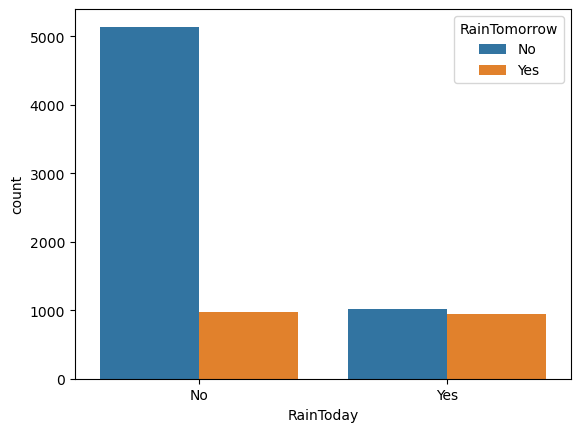

In [45]:
sns.countplot(df['RainToday'],hue=df['RainTomorrow'])

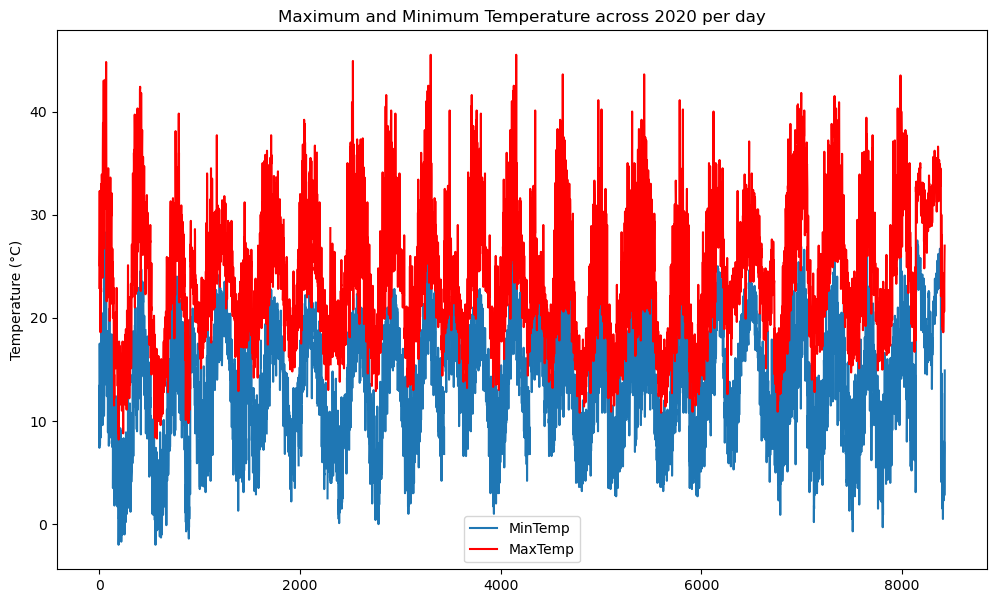

In [46]:
max_temp = df['MaxTemp']
min_temp = df['MinTemp']

min_temp.plot(figsize=(12,7), legend=True)
max_temp.plot(figsize=(12,7), color='r', legend=True)
plt.title('Maximum and Minimum Temperature across 2020 per day')
plt.ylabel('Temperature (°C)')
plt.show()

# Correlation

df['RainTomorrow'].replace('No',0,inplace=True)

df['RainTomorrow'].replace('Yes',1,inplace=True)

df['RainToday'].replace('No',0,inplace=True)

df['RainToday'].replace('Yes',1,inplace=True)

<AxesSubplot:>

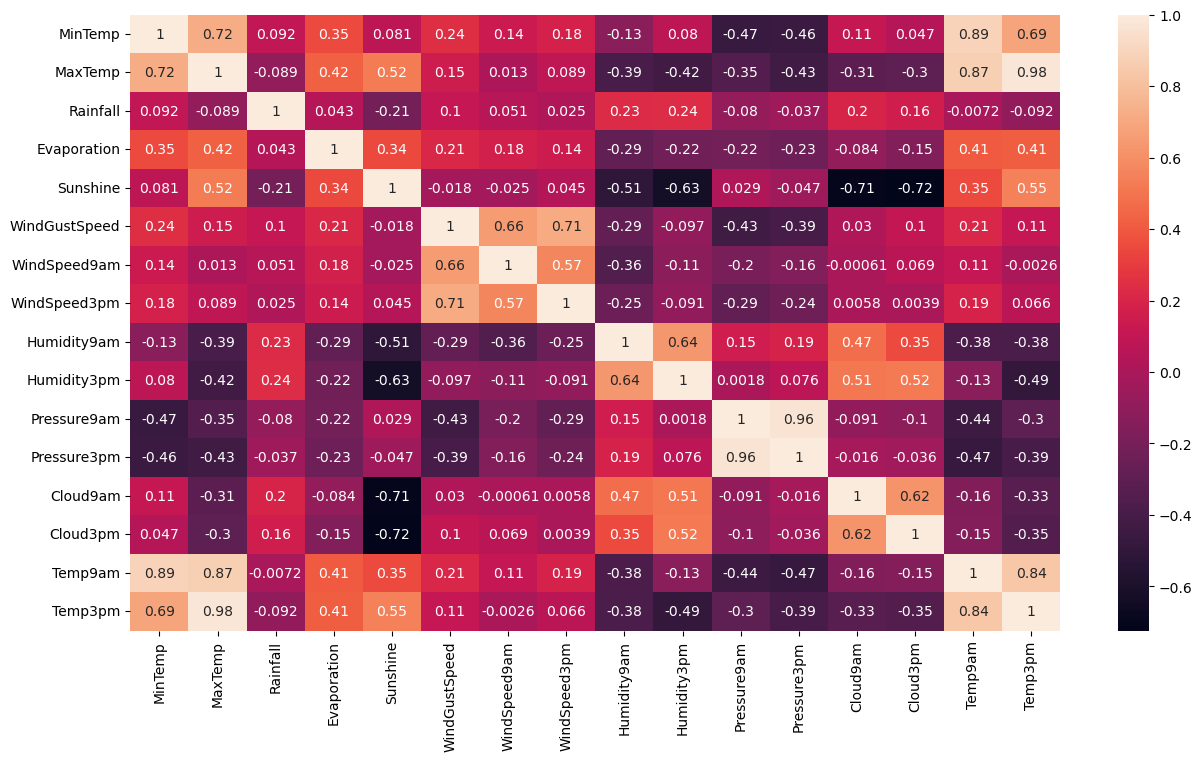

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

# Create Model to predict if TrainTomorrow will happen or not

In [50]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [52]:
# seprate database on basis of RainTomorrow

yes_rain = df[df['RainTomorrow']=='Yes']
no_rain = df[df['RainTomorrow']=='No']

In [53]:
yes_rain.shape , no_rain.shape

((1991, 23), (6195, 23))

In [54]:
# For Temparatures replacing NaN with its respective mode value # Mode is most repeated values

In [55]:
yes_rain['MinTemp'].fillna(yes_rain['MinTemp'].mode()[0],inplace=True)
no_rain['MinTemp'].fillna(no_rain['MinTemp'].mode()[0],inplace=True)

yes_rain['MaxTemp'].fillna(yes_rain['MaxTemp'].mode()[0],inplace=True)
no_rain['MaxTemp'].fillna(no_rain['MaxTemp'].mode()[0],inplace=True)

yes_rain['Temp9am'].fillna(yes_rain['Temp9am'].mode()[0],inplace=True)
no_rain['Temp9am'].fillna(no_rain['Temp9am'].mode()[0],inplace=True)

yes_rain['Temp3pm'].fillna(yes_rain['Temp3pm'].mode()[0],inplace=True)
no_rain['Temp3pm'].fillna(no_rain['Temp3pm'].mode()[0],inplace=True)


yes_rain['Humidity3pm'].fillna(yes_rain['Humidity3pm'].mode()[0],inplace=True)
no_rain['Humidity3pm'].fillna(no_rain['Humidity3pm'].mode()[0],inplace=True)

yes_rain['Humidity9am'].fillna(yes_rain['Humidity9am'].mode()[0],inplace=True)
no_rain['Humidity9am'].fillna(no_rain['Humidity9am'].mode()[0],inplace=True)



In [56]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [63]:

yes_rain['Sunshine'].fillna(yes_rain['Sunshine'].median(),inplace=True)
no_rain['Sunshine'].fillna(no_rain['Sunshine'].median(),inplace=True)

yes_rain['Evaporation'].fillna(yes_rain['Evaporation'].median(),inplace=True)
no_rain['Evaporation'].fillna(no_rain['Evaporation'].median(),inplace=True)

yes_rain['Cloud3pm'].fillna(yes_rain['Cloud3pm'].median(),inplace=True)
no_rain['Cloud3pm'].fillna(no_rain['Cloud3pm'].median(),inplace=True)

yes_rain['Cloud9am'].fillna(yes_rain['Cloud9am'].median(),inplace=True)
no_rain['Cloud9am'].fillna(no_rain['Cloud9am'].median(),inplace=True)

yes_rain['Pressure3pm'].fillna(yes_rain['Pressure3pm'].median(),inplace=True)
no_rain['Pressure3pm'].fillna(no_rain['Pressure3pm'].median(),inplace=True)

yes_rain['Pressure9am'].fillna(yes_rain['Pressure9am'].median(),inplace=True)
no_rain['Pressure9am'].fillna(no_rain['Pressure9am'].median(),inplace=True)

yes_rain['WindGustDir'].fillna(yes_rain['WindGustDir'].mode()[0],inplace=True)
no_rain['WindGustDir'].fillna(no_rain['WindGustDir'].mode()[0],inplace=True)

yes_rain['WindGustSpeed'].fillna(yes_rain['WindGustSpeed'].median(),inplace=True)
no_rain['WindGustSpeed'].fillna(no_rain['WindGustSpeed'].median(),inplace=True)

yes_rain['WindDir9am'].fillna(yes_rain['WindDir9am'].mode()[0],inplace=True)
no_rain['WindDir9am'].fillna(no_rain['WindDir9am'].mode()[0],inplace=True)

yes_rain['WindDir3pm'].fillna(yes_rain['WindDir3pm'].mode()[0],inplace=True)
no_rain['WindDir3pm'].fillna(no_rain['WindDir3pm'].mode()[0],inplace=True)

yes_rain['WindSpeed3pm'].fillna(yes_rain['WindSpeed3pm'].median(),inplace=True)
no_rain['WindSpeed3pm'].fillna(no_rain['WindSpeed3pm'].median(),inplace=True)

yes_rain['WindSpeed9am'].fillna(yes_rain['WindSpeed9am'].median(),inplace=True)
no_rain['WindSpeed9am'].fillna(no_rain['WindSpeed9am'].median(),inplace=True)



yes_rain['Rainfall'].fillna(yes_rain['Rainfall'].median(),inplace=True)
no_rain['Rainfall'].fillna(no_rain['Rainfall'].median(),inplace=True)



In [64]:
data= yes_rain.append(no_rain, ignore_index=True)

In [65]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,2017-06-20,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.0,4.0,9.4,20.9,No,No
8182,2017-06-21,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.0,4.0,10.1,22.4,No,No
8183,2017-06-22,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.0,4.0,10.9,24.5,No,No
8184,2017-06-23,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.0,4.0,12.5,26.1,No,No


In [66]:
data.shape

(8186, 23)

In [67]:
data.dropna(inplace=True)

In [68]:
#data['RainTomorrow'].replace('No',0,inplace=True)
#data['RainTomorrow'].replace('Yes',1,inplace=True)

#data['RainToday'].replace('No',0,inplace=True)
#data['RainToday'].replace('Yes',1,inplace=True)

In [69]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes


In [70]:
# COnvert Date feature into datetime
data['Date']=pd.to_datetime(data['Date'])

In [71]:
data['year']=data['Date'].dt.year

In [72]:
data['month']=data['Date'].dt.month

In [73]:
data['day']=data['Date'].dt.day

In [74]:
data.drop('Date',axis=1,inplace=True)

In [75]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,NW,...,1003.6,7.0,7.0,18.3,30.2,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,1008.7,7.0,7.0,20.4,28.8,No,Yes,2008,12,11
2,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,ENE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,NNW,...,993.0,8.0,8.0,17.4,15.8,Yes,Yes,2008,12,13
4,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,E,...,1010.4,8.0,1.0,17.2,18.1,No,Yes,2008,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,E,...,1021.2,4.0,4.0,9.4,20.9,No,No,2017,6,20
8182,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,ENE,...,1020.3,4.0,4.0,10.1,22.4,No,No,2017,6,21
8183,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,N,...,1019.1,4.0,4.0,10.9,24.5,No,No,2017,6,22
8184,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,WNW,...,1016.8,4.0,4.0,12.5,26.1,No,No,2017,6,23


In [76]:
d1=data  

In [77]:
num=[col for col in data.columns if data[col].dtypes!='O']
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'month',
 'day']

# VIF to find multicolinearity between continuous independent features

In [78]:
v=data[num]

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [81]:
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]

In [82]:
VIF

,features,vif
0,MinTemp,8.536558
1,MaxTemp,25.650652
2,Rainfall,1.131077
3,Evaporation,1.217936
4,Sunshine,2.137066
5,WindGustSpeed,2.353808
6,WindSpeed9am,2.030998
7,WindSpeed3pm,1.946039
8,Humidity9am,3.854017
9,Humidity3pm,5.579726


Temp3pm is having high VIF values, drop this

In [83]:
num.remove('Temp3pm')

In [84]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.466862
1,MaxTemp,9.254373
2,Rainfall,1.129338
3,Evaporation,1.217434
4,Sunshine,2.137021
5,WindGustSpeed,2.342729
6,WindSpeed9am,2.030727
7,WindSpeed3pm,1.941617
8,Humidity9am,3.374870
9,Humidity3pm,3.788957


Pressure9am have high values, delete this feature

In [85]:
num.remove('Pressure9am')

In [86]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.282180
1,MaxTemp,8.650329
2,Rainfall,1.124425
3,Evaporation,1.216592
4,Sunshine,2.134751
5,WindGustSpeed,2.325879
6,WindSpeed9am,2.025740
7,WindSpeed3pm,1.930832
8,Humidity9am,3.374529
9,Humidity3pm,3.783076


In [87]:
num.remove('Temp9am')

In [88]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,4.222621
1,MaxTemp,4.951979
2,Rainfall,1.121856
3,Evaporation,1.215636
4,Sunshine,2.131929
5,WindGustSpeed,2.291850
6,WindSpeed9am,2.006285
7,WindSpeed3pm,1.879912
8,Humidity9am,2.349810
9,Humidity3pm,2.972785


Now, MultiColinearity is under control

We need to delete ['Temp3pm','Temp9am','Pressure9am'] to handle multi colinearity in independent features

In [89]:
data.shape

(8079, 25)

In [90]:
data.drop(['Temp3pm','Temp9am','Pressure9am'],axis=1,inplace=True)

In [91]:
data.shape

(8079, 22)

In [92]:
data.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,NW,...,42.0,9.0,1003.6,7.0,7.0,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,48.0,22.0,1008.7,7.0,7.0,No,Yes,2008,12,11


# Outliers

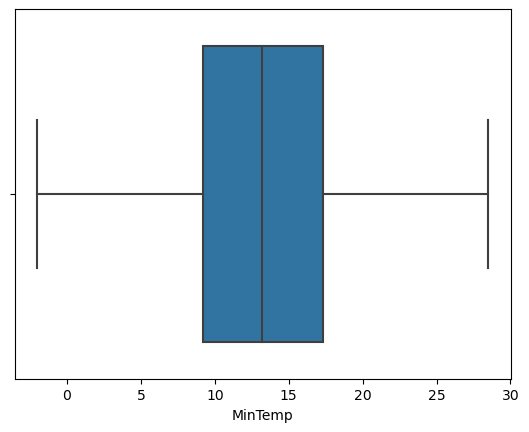

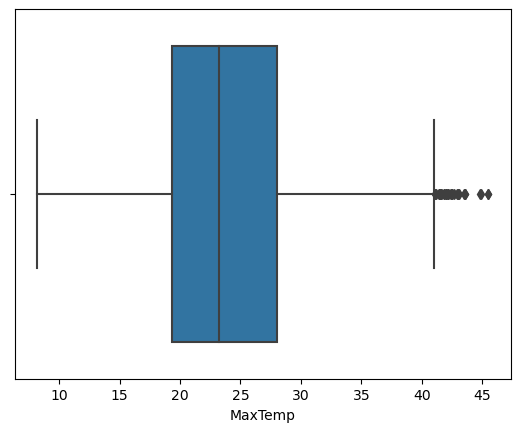

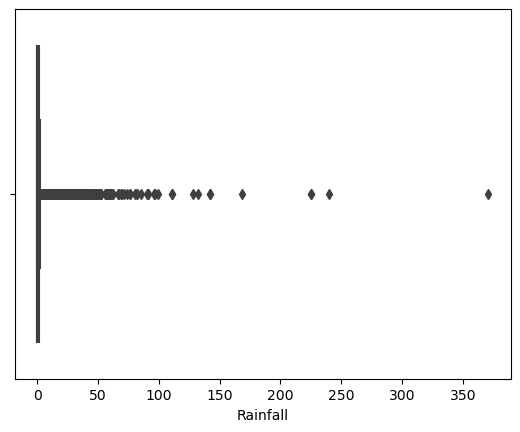

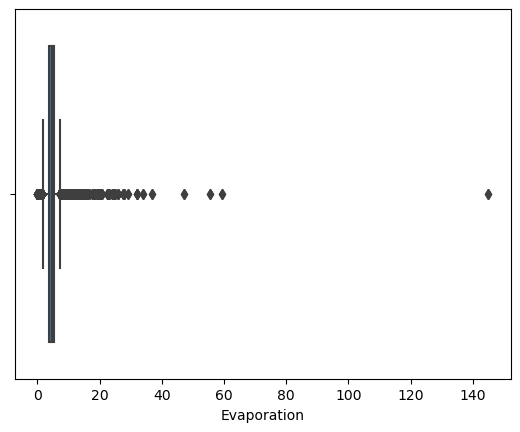

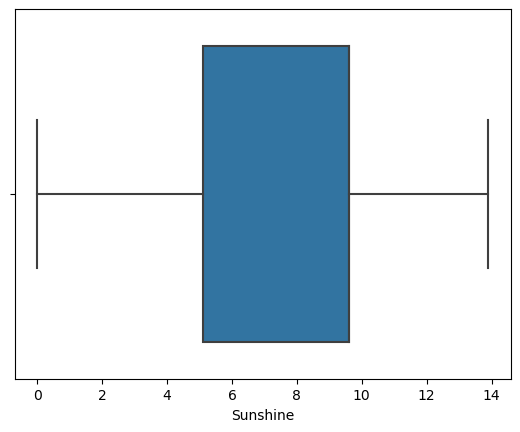

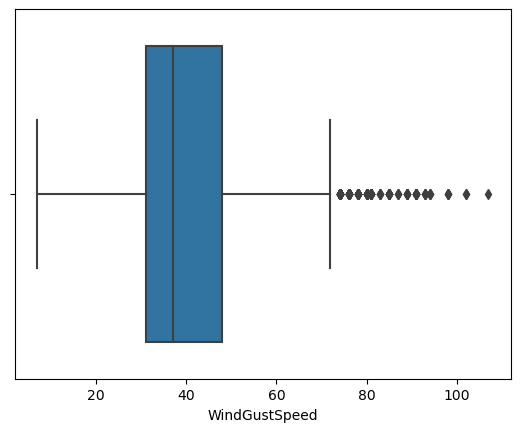

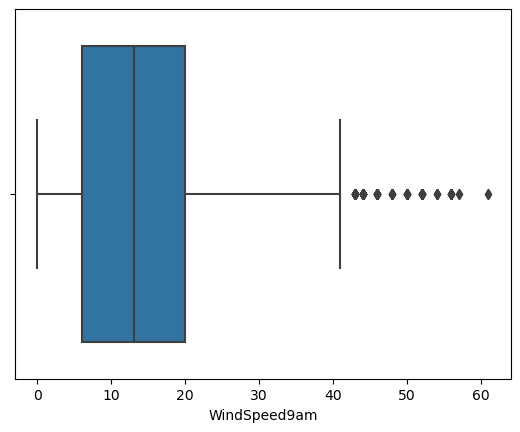

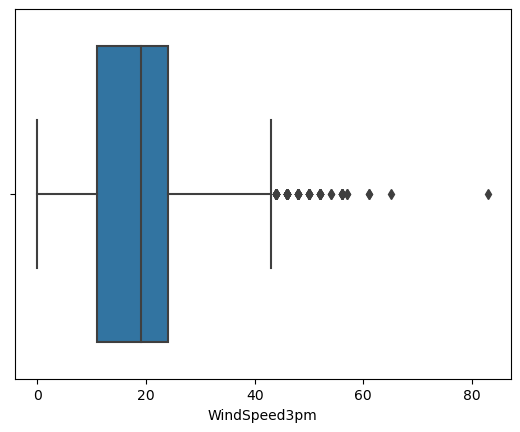

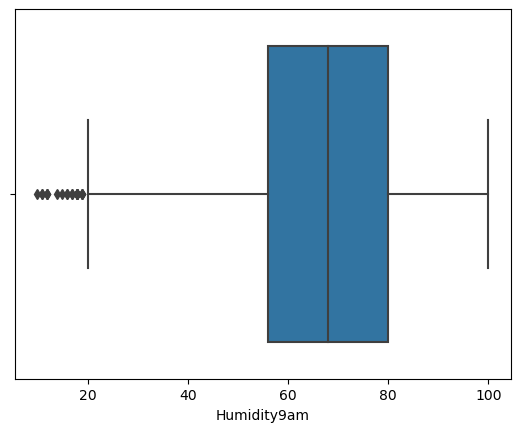

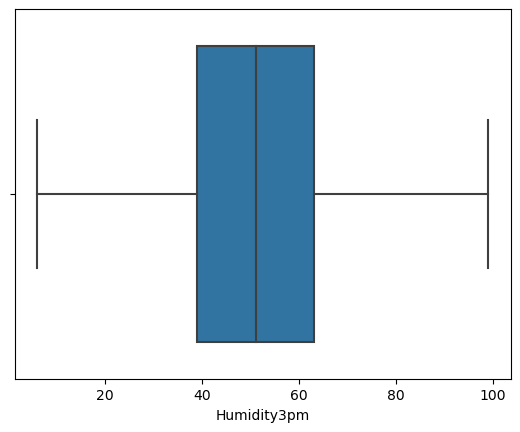

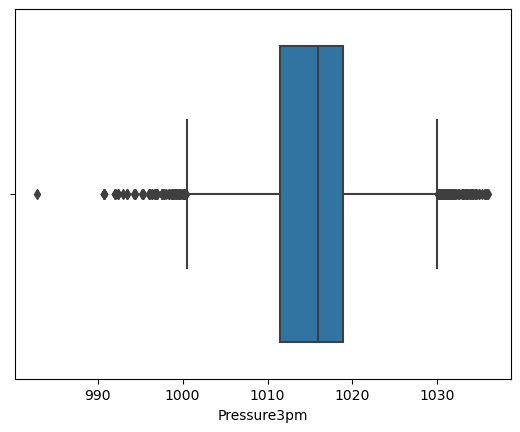

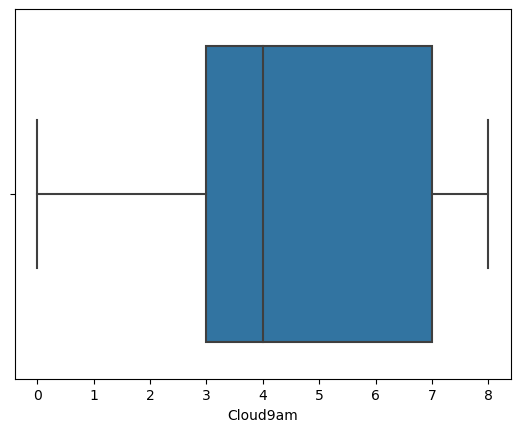

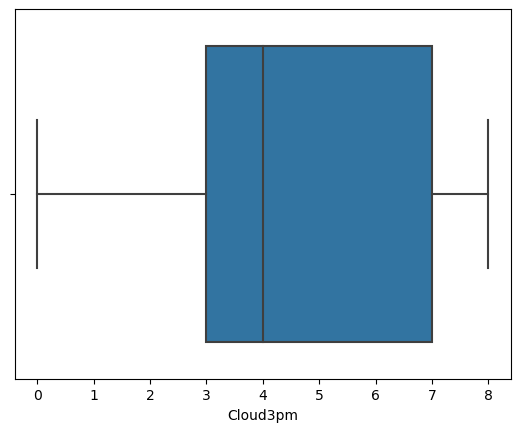

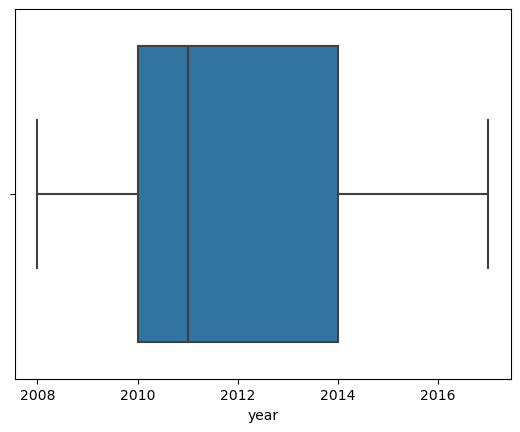

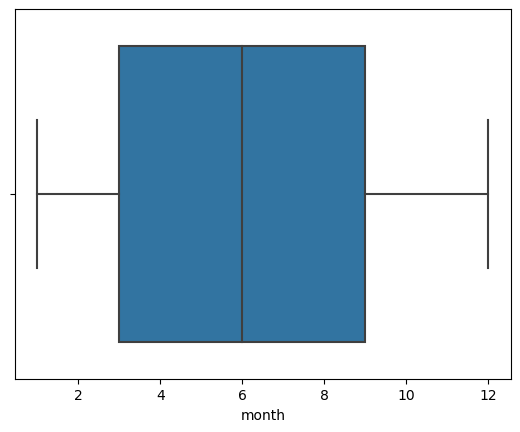

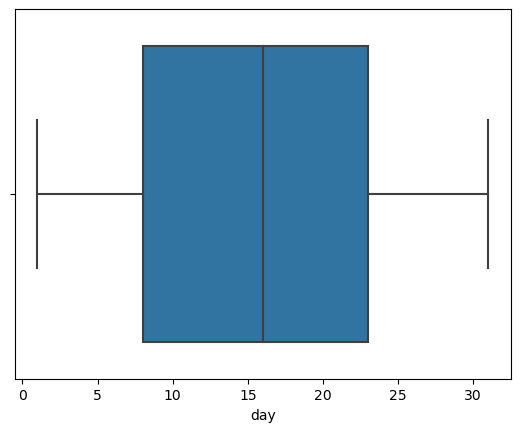

In [93]:
for i in num:
    sns.boxplot(data[i])
    plt.show()

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

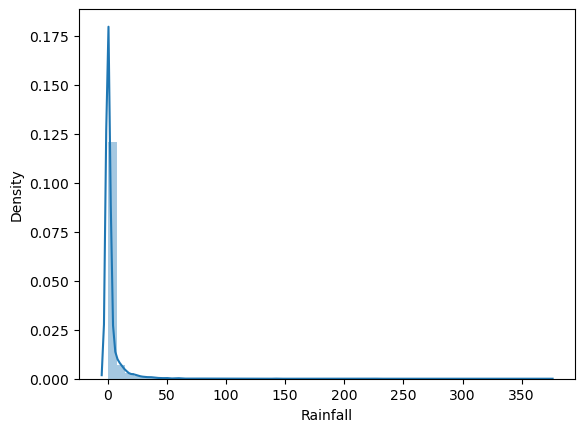

In [94]:
sns.distplot(data['Rainfall'])

Handle outliers with IQR method

In [95]:
data[num].skew()

MinTemp          -0.070098
MaxTemp           0.394841
Rainfall         13.073756
Evaporation      13.998671
Sunshine         -0.822526
WindGustSpeed     0.784800
WindSpeed9am      0.949237
WindSpeed3pm      0.509973
Humidity9am      -0.250378
Humidity3pm       0.118933
Pressure3pm      -0.011625
Cloud9am         -0.261462
Cloud3pm         -0.185359
year              0.421639
month             0.054225
day               0.000577
dtype: float64

Rainfall and Evaporation is highlt skewed

In [96]:
for i in num:
    IQR= data[i].quantile(.75)-data[i].quantile(.25)
    lower=data[i].quantile(.25) - (1.5 * IQR)
    upper=data[i].quantile(.75) + (1.5 * IQR)
    data[i]=np.where(data[i]<lower,lower,data[i])
    data[i]=np.where(data[i]>upper,upper,data[i])

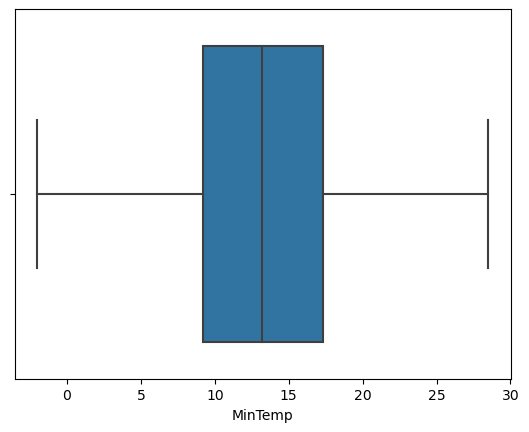

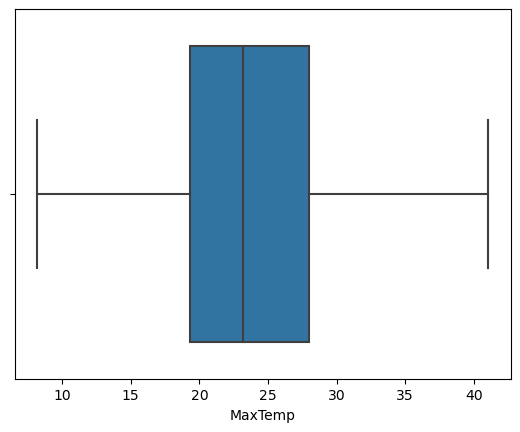

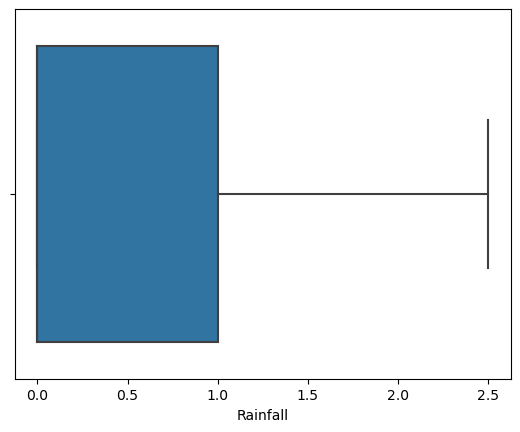

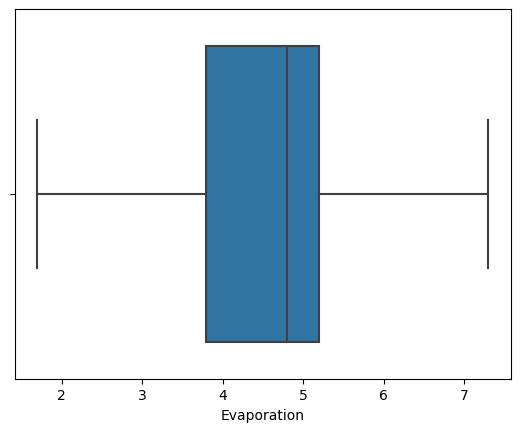

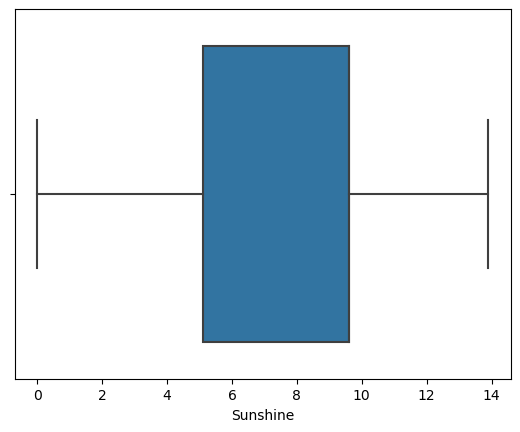

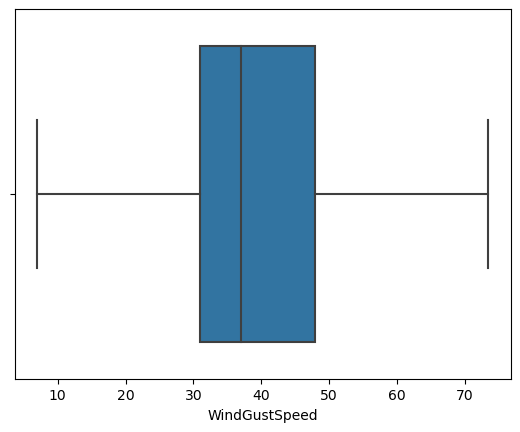

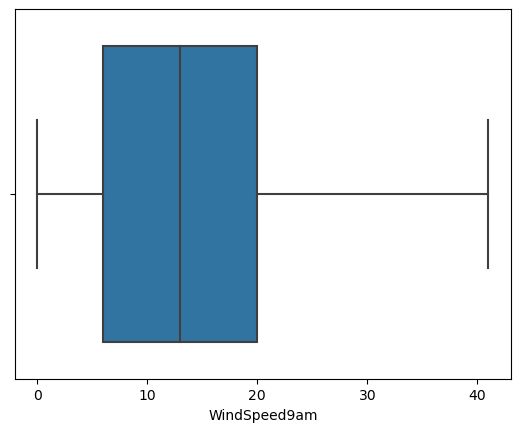

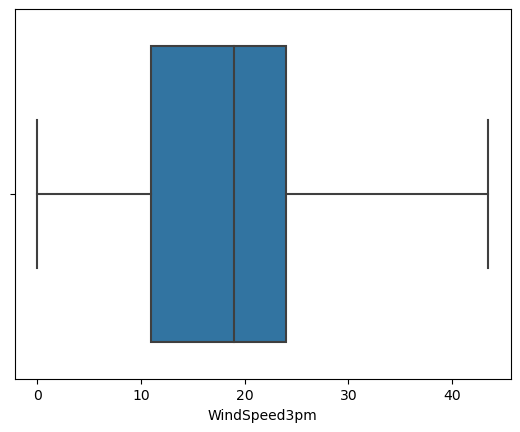

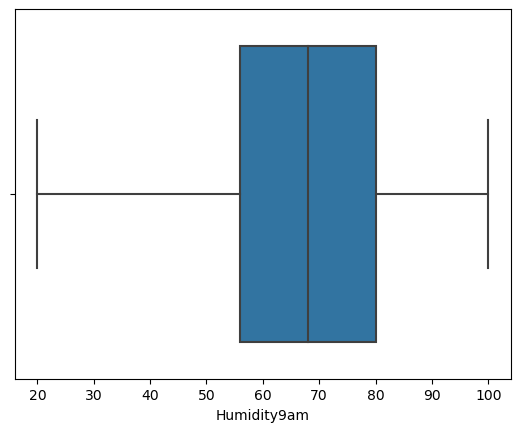

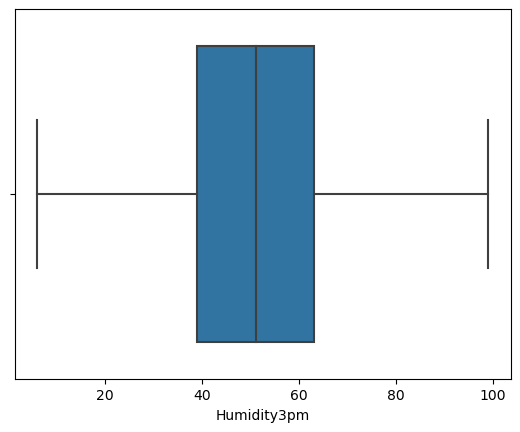

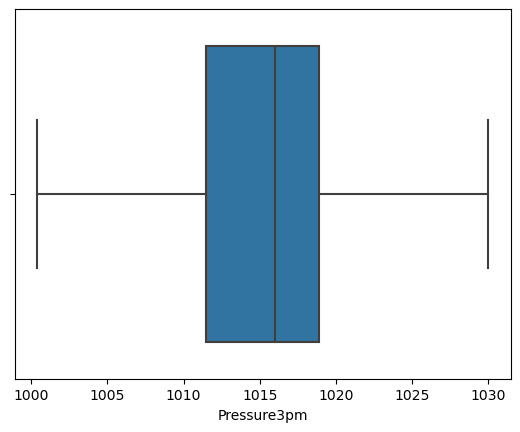

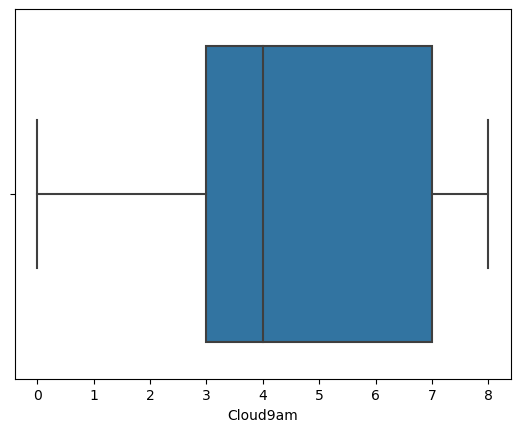

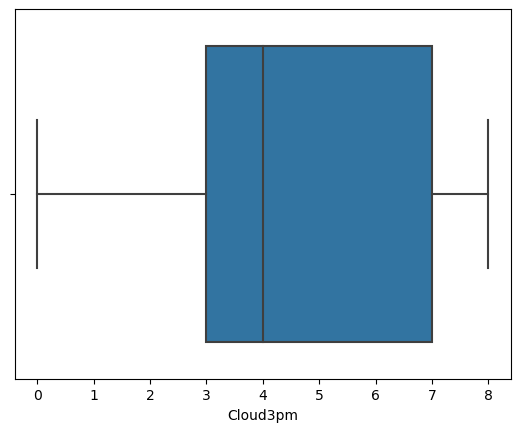

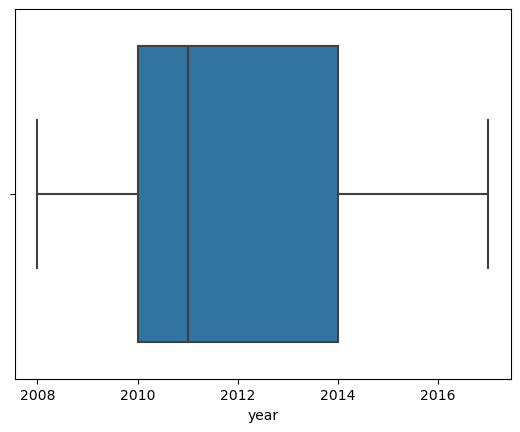

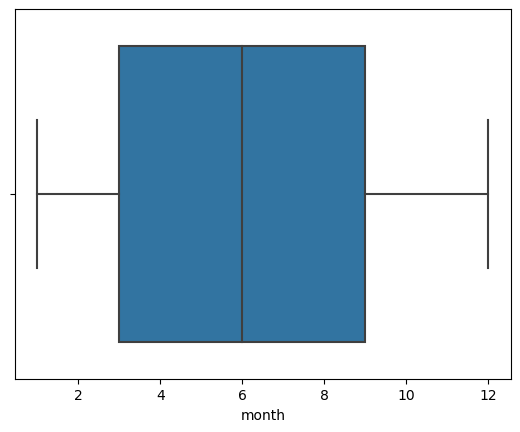

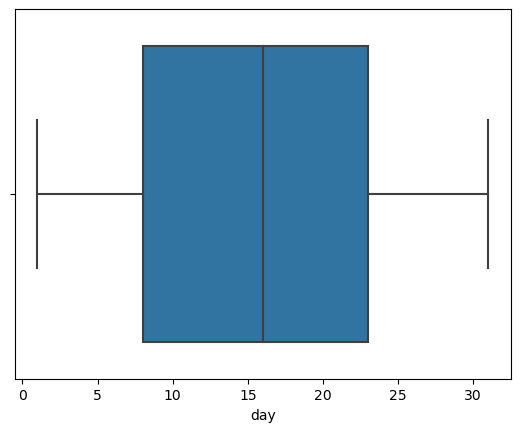

In [97]:
for i in num:
    sns.boxplot(data[i])
    plt.show()

In [98]:
data[num].skew()

MinTemp         -0.070098
MaxTemp          0.372256
Rainfall         1.226519
Evaporation      0.042898
Sunshine        -0.822526
WindGustSpeed    0.556656
WindSpeed9am     0.743355
WindSpeed3pm     0.347722
Humidity9am     -0.235208
Humidity3pm      0.118933
Pressure3pm      0.015165
Cloud9am        -0.261462
Cloud3pm        -0.185359
year             0.421639
month            0.054225
day              0.000577
dtype: float64

 Skewness has been handled

# Transformation

In [100]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [101]:
for i in num:
    trans=power_transform(data[num])
    data[i]=sc.fit_transform(trans)

In [102]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,NW,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,No,Yes,-0.642992,-0.642992,-0.642992
1,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,ESE,...,0.031187,0.031187,0.031187,0.031187,0.031187,No,Yes,0.031187,0.031187,0.031187
2,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,ENE,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
3,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,NNW,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
4,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,E,...,0.161018,0.161018,0.161018,0.161018,0.161018,No,Yes,0.161018,0.161018,0.161018


# Encoding

In [103]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,NW,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,No,Yes,-0.642992,-0.642992,-0.642992
1,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,ESE,...,0.031187,0.031187,0.031187,0.031187,0.031187,No,Yes,0.031187,0.031187,0.031187
2,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,ENE,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
3,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,NNW,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
4,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,E,...,0.161018,0.161018,0.161018,0.161018,0.161018,No,Yes,0.161018,0.161018,0.161018


In [104]:
chitest=data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]
chitest

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,Albury,NNW,SE,NW,Yes
1,Albury,N,SSE,ESE,Yes
2,Albury,NNE,NE,ENE,Yes
3,Albury,W,NNW,NNW,Yes
4,Albury,ENE,SSW,E,Yes
...,...,...,...,...,...
8181,Uluru,E,ESE,E,No
8182,Uluru,E,SE,ENE,No
8183,Uluru,NNW,SE,N,No
8184,Uluru,N,SE,WNW,No


In [105]:
import numpy as np
### let's perform label encoding on WindGustDir
ordinal_label = {k: i for i, k in enumerate(chitest['WindGustDir'].unique(), 0)}
chitest['WindGustDir'] = chitest['WindGustDir'].map(ordinal_label)

In [106]:
ordinal_label = {k: i for i, k in enumerate(chitest['Location'].unique(), 0)}
chitest['Location'] = chitest['Location'].map(ordinal_label)

In [107]:
ordinal_label = {k: i for i, k in enumerate(chitest['WindDir9am'].unique(), 0)}
chitest['WindDir9am'] = chitest['WindDir9am'].map(ordinal_label)

In [108]:
ordinal_label = {k: i for i, k in enumerate(chitest['WindDir3pm'].unique(), 0)}
chitest['WindDir3pm'] = chitest['WindDir3pm'].map(ordinal_label)

In [109]:
chitest['RainTomorrow'].replace('No',0,inplace=True)
chitest['RainTomorrow'].replace('Yes',1,inplace=True)

In [110]:
chitest

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,0,0,0,0,1
1,0,1,1,1,1
2,0,2,2,2,1
3,0,3,3,3,1
4,0,4,4,4,1
...,...,...,...,...,...
8181,11,12,7,4,0
8182,11,12,0,2,0
8183,11,0,0,9,0
8184,11,1,0,5,0


In [111]:
inp=chitest.drop('RainTomorrow',axis=1)
out=chitest['RainTomorrow']

In [112]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(inp,out)

In [113]:
f_p_values

(array([34.02791176,  2.63753342, 20.16354411,  0.47166443]),
 array([5.43271338e-09, 1.04365465e-01, 7.10950475e-06, 4.92222447e-01]))

In [114]:

p_values=pd.Series(f_p_values[1])
p_values.index=inp.columns
p_values

Location       5.432713e-09
WindGustDir    1.043655e-01
WindDir9am     7.109505e-06
WindDir3pm     4.922224e-01
dtype: float64

<AxesSubplot:>

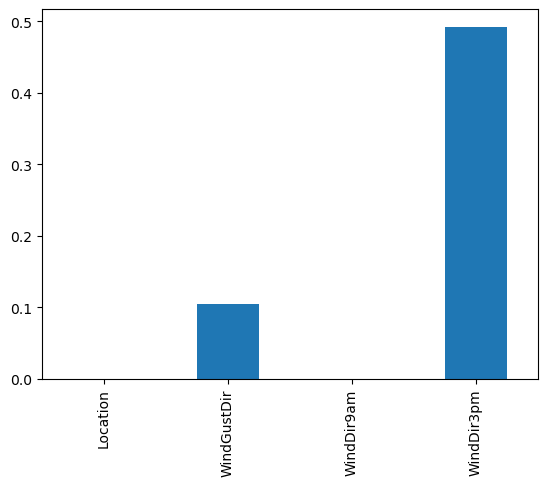

In [115]:
p_values.plot.bar()

In [116]:
16-1 * (2-1 )

15

In [112]:
data.drop('WindDir3pm',axis=1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,-0.642992,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,No,Yes,-0.642992,-0.642992,-0.642992
1,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,0.031187,...,0.031187,0.031187,0.031187,0.031187,0.031187,No,Yes,0.031187,0.031187,0.031187
2,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,0.498052,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
3,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,0.498052,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
4,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,0.161018,...,0.161018,0.161018,0.161018,0.161018,0.161018,No,Yes,0.161018,0.161018,0.161018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,Uluru,-1.794801,-1.751381,-1.751381,-1.751381,-1.751381,E,-1.751381,ESE,-1.751381,...,-1.751381,-1.751381,-1.751381,-1.751381,-1.751381,No,No,-1.751381,-1.751381,-1.751381
8182,Uluru,-1.928608,-1.876512,-1.876512,-1.876512,-1.876512,E,-1.876512,SE,-1.876512,...,-1.876512,-1.876512,-1.876512,-1.876512,-1.876512,No,No,-1.876512,-1.876512,-1.876512
8183,Uluru,-1.775739,-1.733525,-1.733525,-1.733525,-1.733525,NNW,-1.733525,SE,-1.733525,...,-1.733525,-1.733525,-1.733525,-1.733525,-1.733525,No,No,-1.733525,-1.733525,-1.733525
8184,Uluru,-1.434531,-1.412489,-1.412489,-1.412489,-1.412489,N,-1.412489,SE,-1.412489,...,-1.412489,-1.412489,-1.412489,-1.412489,-1.412489,No,No,-1.412489,-1.412489,-1.412489


# Encoding

In [113]:
data['RainTomorrow'].replace('No',0,inplace=True)
data['RainTomorrow'].replace('Yes',1,inplace=True)

data['RainToday'].replace('No',0,inplace=True)
data['RainToday'].replace('Yes',1,inplace=True)

In [114]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,NW,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,0,1,-0.642992,-0.642992,-0.642992
1,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,ESE,...,0.031187,0.031187,0.031187,0.031187,0.031187,0,1,0.031187,0.031187,0.031187
2,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,ENE,...,0.498052,0.498052,0.498052,0.498052,0.498052,1,1,0.498052,0.498052,0.498052
3,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,NNW,...,0.498052,0.498052,0.498052,0.498052,0.498052,1,1,0.498052,0.498052,0.498052
4,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,E,...,0.161018,0.161018,0.161018,0.161018,0.161018,0,1,0.161018,0.161018,0.161018


In [115]:
X=data.drop('RainTomorrow',axis=1)
Y=data['RainTomorrow']

In [116]:
X.shape  , Y.shape

((8079, 21), (8079,))

In [117]:
X=pd.get_dummies(X,drop_first=True)

In [118]:
X.shape , Y.shape

((8079, 73), (8079,))

# SMOTE- Balancing dataset

In [119]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,Y)

In [120]:
x.shape , y.shape

((12310, 73), (12310,))

# Machinbe Leaning

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [122]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7695640400758191 on Random State = 166


In [123]:
# Use, Random state= 122

In [124]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=122,test_size=.3)

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [127]:
accuracy=[]
f1=[]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    #print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    #print("F1 SCore                ", f1_score(y_test,pred)*100)
    #print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    #print(classification_report(y_test,pred))
    #print('*'*50)
    
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

[12:13:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,F1 Score
0,LogisticRegression(),76.23,75.28
1,RidgeClassifier(),76.14,74.62
2,DecisionTreeClassifier(),82.48,82.93
3,SVC(),80.26,80.15
4,KNeighborsClassifier(),77.23,80.77
5,"(DecisionTreeClassifier(max_features='auto', r...",86.43,86.30
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",84.62,85.08
7,SGDClassifier(),75.25,73.80
8,(DecisionTreeClassifier(random_state=212996541...,85.05,85.06
9,"(DecisionTreeClassifier(max_depth=1, random_st...",71.65,71.02


# BaggingClassifier() Hypertuning

In [128]:
params = {'n_estimators' : [100,150,200,300,500],
    'max_features' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
GCV=GridSearchCV(Bag_model,param_grid=params,cv=5,n_jobs=-1,verbose=2)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 150, 200, 300, 500]},
             verbose=2)

In [131]:
GCV.best_estimator_

BaggingClassifier(max_features=5, max_samples=0.5, n_estimators=200)

In [132]:
GCV.best_params_

{'max_features': 5, 'max_samples': 0.5, 'n_estimators': 200}

In [133]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7776875169239101

# Confusion Matrix

<AxesSubplot:>

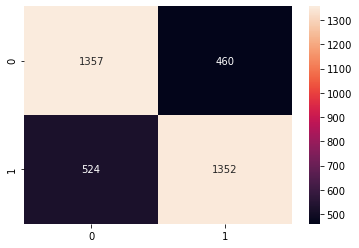

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

# AUC ROC plot

In [135]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

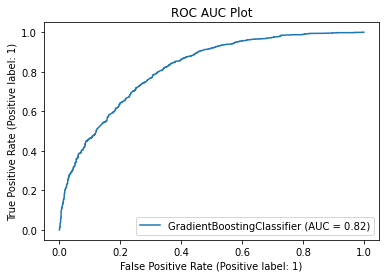

In [136]:
plot_roc_curve(GB_model,x_test,y_test)
plt.title('ROC AUC Plot')

# Saving Model

In [137]:
import joblib
joblib.dump(GB_model,"Rainfall_Prediction.pkl")

['Rainfall_Prediction.pkl']

# Predict the Rainfall in MM.  Regression Model

Target Variable is Rainfall

In [285]:
d1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,NW,...,1003.6,7.0,7.0,18.3,30.2,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,1008.7,7.0,7.0,20.4,28.8,No,Yes,2008,12,11
2,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,ENE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,NNW,...,993.0,8.0,8.0,17.4,15.8,Yes,Yes,2008,12,13
4,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,E,...,1010.4,8.0,1.0,17.2,18.1,No,Yes,2008,12,17


In [287]:
round(d1.isnull().sum()/d1.shape[0]*100,2).sort_values(ascending=False)

Location         0.0
Humidity3pm      0.0
month            0.0
year             0.0
RainTomorrow     0.0
RainToday        0.0
Temp3pm          0.0
Temp9am          0.0
Cloud3pm         0.0
Cloud9am         0.0
Pressure3pm      0.0
Pressure9am      0.0
Humidity9am      0.0
MinTemp          0.0
WindSpeed3pm     0.0
WindSpeed9am     0.0
WindDir3pm       0.0
WindDir9am       0.0
WindGustSpeed    0.0
WindGustDir      0.0
Sunshine         0.0
Evaporation      0.0
Rainfall         0.0
MaxTemp          0.0
day              0.0
dtype: float64

<AxesSubplot:>

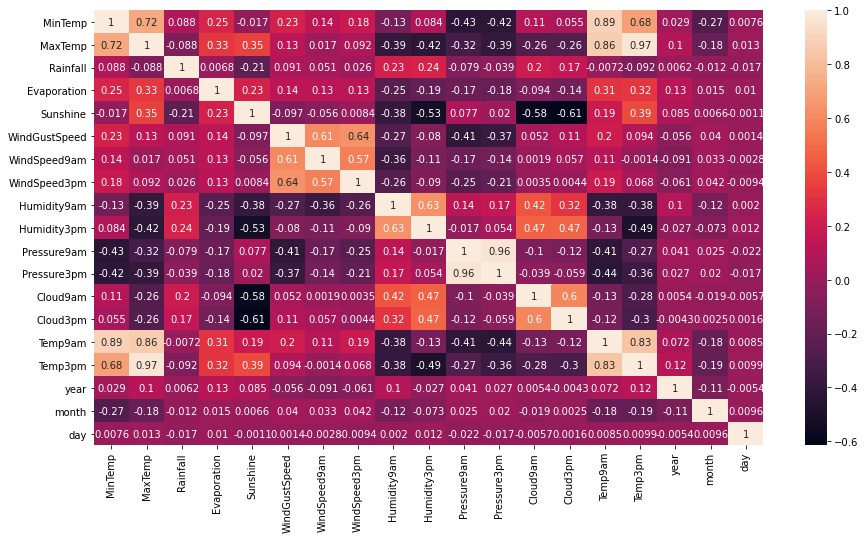

In [289]:
plt.figure(figsize=(15,8))
sns.heatmap(d1.corr(),annot=True)

In [291]:
cont= [i for i in d1.columns if d1[i].dtypes!='O']

In [294]:
cont.remove('Rainfall')

In [298]:
cont

['MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'month',
 'day']

In [296]:
v=d1[cont]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.536366
1,MaxTemp,25.567424
2,Evaporation,1.214048
3,Sunshine,2.129453
4,WindGustSpeed,2.340935
5,WindSpeed9am,2.024577
6,WindSpeed3pm,1.942414
7,Humidity9am,3.787865
8,Humidity3pm,5.577035
9,Pressure9am,18.067358


MaxTemp is very well explained by other features, so we can drop this

In [299]:
cont.remove('MaxTemp')

In [300]:
v=d1[cont]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.501007
1,Evaporation,1.213049
2,Sunshine,2.125149
3,WindGustSpeed,2.309797
4,WindSpeed9am,2.015116
5,WindSpeed3pm,1.940482
6,Humidity9am,3.752514
7,Humidity3pm,5.468629
8,Pressure9am,18.049820
9,Pressure3pm,17.707229


Pressure9am is vsery well explained by other features, so drop this

In [301]:
cont.remove('Pressure9am')

In [302]:
v=d1[cont]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.274672
1,Evaporation,1.211522
2,Sunshine,2.123239
3,WindGustSpeed,2.296302
4,WindSpeed9am,2.011239
5,WindSpeed3pm,1.934052
6,Humidity9am,3.728409
7,Humidity3pm,5.331299
8,Pressure3pm,1.434781
9,Cloud9am,2.016984


Temp9am is also explained by other features very well

In [303]:
cont.remove('Temp9am')

In [304]:
v=d1[cont]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,4.615971
1,Evaporation,1.210841
2,Sunshine,2.119527
3,WindGustSpeed,2.283538
4,WindSpeed9am,1.986122
5,WindSpeed3pm,1.878813
6,Humidity9am,2.323853
7,Humidity3pm,3.736856
8,Pressure3pm,1.425109
9,Cloud9am,1.991343


Multicolinearity is in limits now, Proceed with these features

We need to drop  ['Temp9am','Pressure9am','MaxTemp'] from d1

In [306]:
d1.drop(['Temp9am','Pressure9am','MaxTemp'],axis=1, inplace=True)

In [307]:
d1.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,0.0,3.8,4.2,NNW,80.0,SE,NW,7.0,...,9.0,1003.6,7.0,7.0,30.2,No,Yes,2008,12,9
1,Albury,13.4,0.0,3.8,4.2,N,30.0,SSE,ESE,17.0,...,22.0,1008.7,7.0,7.0,28.8,No,Yes,2008,12,11
2,Albury,15.9,2.2,3.8,4.2,NNE,31.0,NE,ENE,15.0,...,91.0,1004.2,8.0,8.0,17.0,Yes,Yes,2008,12,12
3,Albury,15.9,15.6,3.8,4.2,W,61.0,NNW,NNW,28.0,...,93.0,993.0,8.0,8.0,15.8,Yes,Yes,2008,12,13
4,Albury,14.1,0.0,3.8,4.2,ENE,22.0,SSW,E,11.0,...,82.0,1010.4,8.0,1.0,18.1,No,Yes,2008,12,17


<AxesSubplot:>

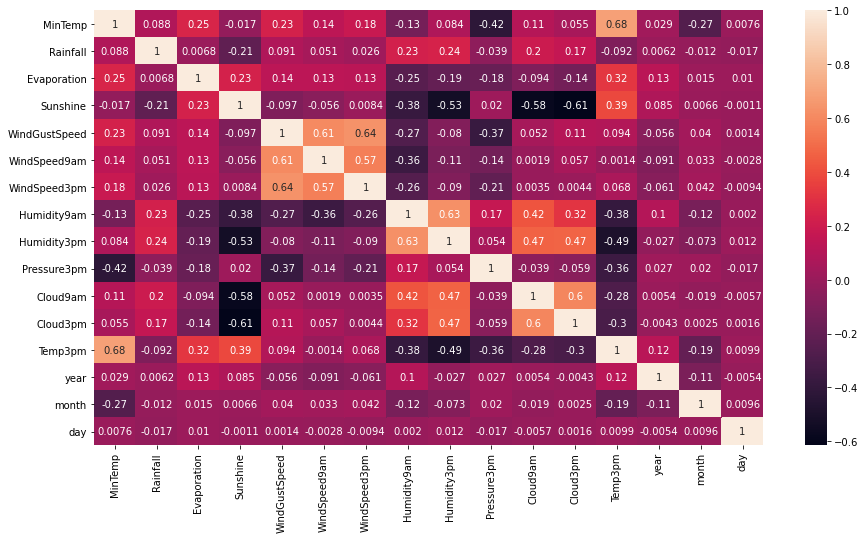

In [308]:
plt.figure(figsize=(15,8))
sns.heatmap(d1.corr(),annot=True)

Seprate independent and dependent features

In [309]:
X=d1.drop('Rainfall',axis=1)
Y=d1['Rainfall']

In [310]:
X.shape , Y.shape

((8079, 21), (8079,))

In [313]:
cont= [i for i in X.columns if X[i].dtypes!='O']

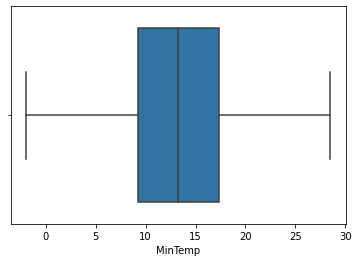

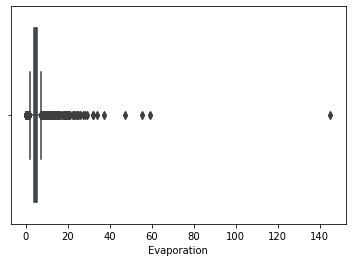

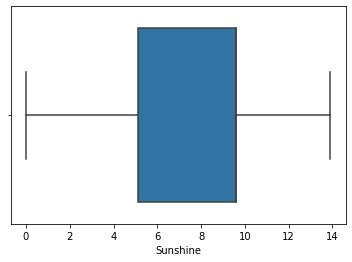

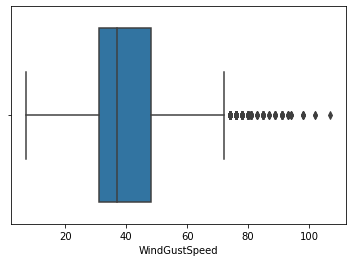

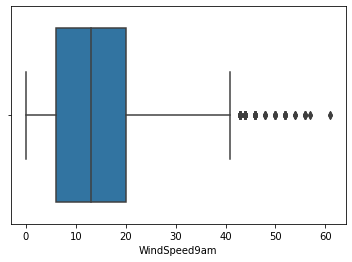

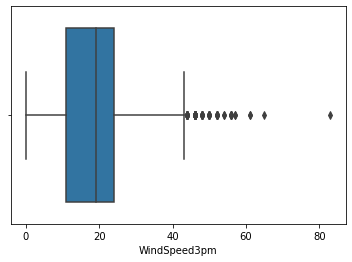

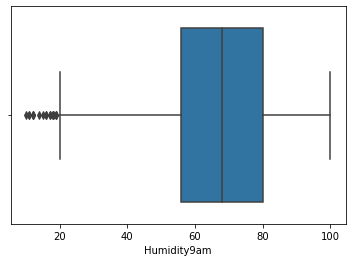

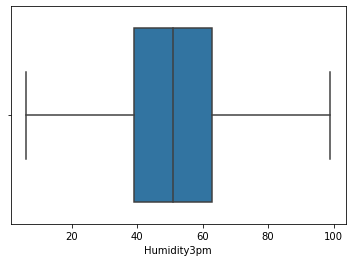

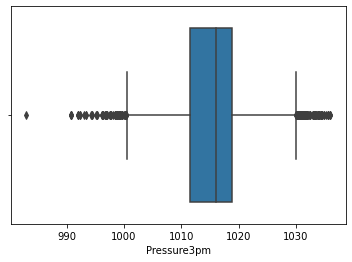

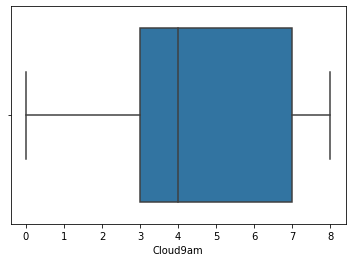

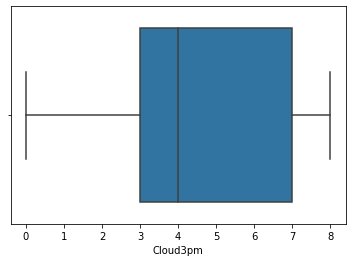

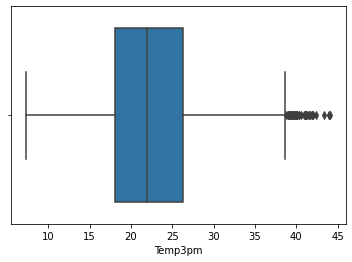

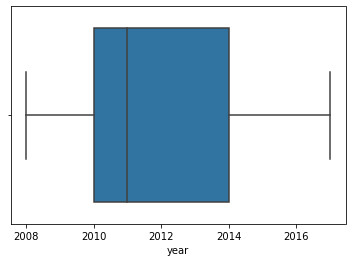

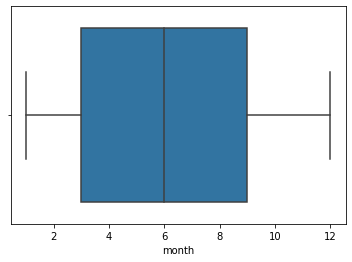

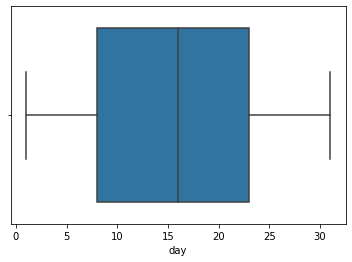

In [314]:
for i in cont:
    sns.boxplot(X[i])
    plt.show()

In [316]:
X[cont].skew()

MinTemp          -0.070098
Evaporation      13.998671
Sunshine         -0.822526
WindGustSpeed     0.784800
WindSpeed9am      0.949237
WindSpeed3pm      0.509973
Humidity9am      -0.250378
Humidity3pm       0.118933
Pressure3pm      -0.011625
Cloud9am         -0.261462
Cloud3pm         -0.185359
Temp3pm           0.403189
year              0.421639
month             0.054225
day               0.000577
dtype: float64

In [317]:
for i in cont:
    IQR= X[i].quantile(.75)-X[i].quantile(.25)
    lower=X[i].quantile(.25) - (1.5 * IQR)
    upper=X[i].quantile(.75) + (1.5 * IQR)
    X[i]=np.where(X[i]<lower,lower,X[i])
    X[i]=np.where(X[i]>upper,upper,X[i])

In [318]:
X[cont].skew()

MinTemp         -0.070098
Evaporation      0.042898
Sunshine        -0.822526
WindGustSpeed    0.556656
WindSpeed9am     0.743355
WindSpeed3pm     0.347722
Humidity9am     -0.235208
Humidity3pm      0.118933
Pressure3pm      0.015165
Cloud9am        -0.261462
Cloud3pm        -0.185359
Temp3pm          0.362087
year             0.421639
month            0.054225
day              0.000577
dtype: float64

Skewness removed after handling outliers

# Transformation

In [319]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [320]:
for i in cont:
    trans=power_transform(data[cont])
    X[i]=sc.fit_transform(trans)

In [321]:
X.head()

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.630013,-0.630013,NNW,-0.630013,SE,NW,-0.630013,-0.630013,...,-0.630013,-0.630013,-0.630013,-0.630013,-0.630013,No,Yes,-0.630013,-0.630013,-0.630013
1,Albury,0.054150,0.054150,0.054150,N,0.054150,SSE,ESE,0.054150,0.054150,...,0.054150,0.054150,0.054150,0.054150,0.054150,No,Yes,0.054150,0.054150,0.054150
2,Albury,0.513327,0.513327,0.513327,NNE,0.513327,NE,ENE,0.513327,0.513327,...,0.513327,0.513327,0.513327,0.513327,0.513327,Yes,Yes,0.513327,0.513327,0.513327
3,Albury,0.513327,0.513327,0.513327,W,0.513327,NNW,NNW,0.513327,0.513327,...,0.513327,0.513327,0.513327,0.513327,0.513327,Yes,Yes,0.513327,0.513327,0.513327
4,Albury,0.182945,0.182945,0.182945,ENE,0.182945,SSW,E,0.182945,0.182945,...,0.182945,0.182945,0.182945,0.182945,0.182945,No,Yes,0.182945,0.182945,0.182945


# Encoding

In [324]:
X=pd.get_dummies(X,drop_first=True)

In [325]:
X.shape  , Y.shape

((8079, 73), (8079,))

# Machine LEarning

In [326]:
# Its a Regression problem coz output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [336]:
# Train Test Split / finding best random_state for my model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  22 The model performance very well
At random state:  22
Test R2 score is:  0.23
Train R2 score is:  0.23
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  61 The model performance very well
At random state:  61
Test R2 score is:  0.23
Train R2 score is:  0.23
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [337]:
# Select Random state= 23

x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=23,test_size=.3)
LR.fit(x_train,y_train)

LinearRegression()

In [338]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [339]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [340]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 3.2026067303561594
mean_square_error of LinearRegression() model 48.388428976437005
R2 Score of LinearRegression() model 29.597555725212377
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 3.196411040570752
mean_square_error of Ridge() model 48.35592353998347
R2 Score of Ridge() model 29.644849308140266
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 2.9325306357482535
mean_square_error of Lasso() model 51.77794223612158
R2 Score of Lasso() model 24.666004454973802
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 2.059718325999267
mean_square_error of DecisionTreeRegressor() model 76.53750448409424
R2 Score of DecisionTreeRegressor() model -11.357766894987975
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 1.94133273010167
mean_square_error of SVR() mod

# Cross Validation

In [341]:
from sklearn.model_selection import cross_val_score

In [343]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 6.956179193813009
cross Validation score of root mean square  LinearRegression()  is  29979594.082164157
**************************************************
Root mean_square of  Ridge() model 6.953842358004923
cross Validation score of root mean square  Ridge()  is  9.531403360522999
**************************************************
Root mean_square of  Lasso() model 7.195689142543721
cross Validation score of root mean square  Lasso()  is  9.690308555302854
**************************************************
Root mean_square of  DecisionTreeRegressor() model 8.748571568210107
cross Validation score of root mean square  DecisionTreeRegressor()  is  11.37171867202466
**************************************************
Root mean_square of  SVR() model 7.315553732741568
cross Validation score of root mean square  SVR()  is  9.720821121550763
**************************************************
Root mean_square of  KNeighborsRegressor() model 7.938

# Hyper tuning of Random Forest

In [344]:
n_estimator= [200, 400, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}

In [347]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [350]:
grid_search=RandomizedSearchCV(estimator=RFR_model,param_distributions=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   verbose=2)

In [351]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=118, min_samples_leaf=9, n_estimators=800)

In [352]:
grid_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_features': 'auto',
 'max_depth': 118}

In [354]:
GCV_pred=grid_search.best_estimator_.predict(x_test)

np.sqrt(mean_squared_error(y_test,GCV_pred))

6.914423084912407

# Saving model for future use

In [355]:
import joblib
joblib.dump(grid_search.best_estimator_,"Rainfall_Prediction_in_mm.pkl")

['Rainfall_Prediction_in_mm.pkl']